# University Football Injury Prediction Using Naive Bayes Classifier
## Idea 1 - Team 13
Team Members:
Malak El-Hamshary (ID:91241072)

Rowida Mohammed (ID: 91240303)

Mona Mohamed Elkholy (ID: 91241075)

Khadija Zakaria Mabrouk (ID: 91240965)

# Data Handling & Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

The University Football Injury Prediction Dataset was downloaded from Kaggle (https://www.kaggle.com/datasets/yuanchunhong/university-football-injury-prediction-dataset/data
) and uploaded to the working environment in CSV format.

In [3]:
# Load dataset
from google.colab import files
uploaded = files.upload()


# Load dataset
df = pd.read_csv("data.csv")
print(df.shape)
# Display first rows
df.head()

Saving data.csv to data.csv
(800, 19)


,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932


### Dataset Summary

- **Samples:** 800 university football players  
- **Features:** 18 input features + 1 target label  
- **Task:** classification (0 = No Injury, 1 = Injury)  
- **Age Range:** 18–24 years (typical university students)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m_s          800 non-null    float64
 12  Agility_Score               800 non-null    float64
 13  Sleep_Hours_Per_Night       800 non

In [5]:
df.describe()

,Age,Height_cm,Weight_kg,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.135000,177.407500,73.235000,9.951150,22.332500,1.536250,74.933249,79.154123,249.423244,83.832337,5.949025,78.341311,7.417124,54.039342,74.382174,0.597500,0.500000,23.377364
std,1.991037,7.148974,9.929276,2.610395,10.311516,1.292584,6.672704,6.782332,22.532387,6.931657,0.329133,8.775418,0.793183,11.421143,9.324899,0.490708,0.500313,3.673279
min,18.000000,154.000000,45.000000,5.000000,5.000000,0.000000,52.391351,58.180381,180.000000,60.059484,4.862435,50.000000,5.000000,21.561186,50.000000,0.000000,0.000000,14.346326
25%,19.000000,173.000000,66.000000,8.127151,13.000000,1.000000,70.432656,74.495959,234.089585,79.044910,5.732552,72.675392,6.850062,45.775371,67.809084,0.000000,0.000000,20.786644
50%,21.000000,177.000000,73.000000,9.895710,22.000000,1.000000,74.997933,79.187909,249.127328,84.156236,5.937692,78.340973,7.424618,54.047208,74.363878,1.000000,0.500000,23.130560
75%,23.000000,182.000000,80.000000,11.535140,32.000000,2.000000,79.632391,83.813179,265.105082,88.877902,6.159205,84.093489,7.988100,61.910804,80.502613,1.000000,1.000000,26.024182
max,24.000000,200.000000,105.000000,18.866608,39.000000,8.000000,93.900051,100.000000,306.730851,100.000000,6.898228,100.000000,9.860553,87.065007,100.000000,1.000000,1.000000,36.262439


In [6]:
df.dtypes

,0
Age,int64
Height_cm,int64
Weight_kg,int64
Position,object
Training_Hours_Per_Week,float64
Matches_Played_Past_Season,int64
Previous_Injury_Count,int64
Knee_Strength_Score,float64
Hamstring_Flexibility,float64
Reaction_Time_ms,float64


- **Class Balance:** Well-balanced dataset  

In [7]:
df['Injury_Next_Season'].value_counts()

,count
Injury_Next_Season,
0,400
1,400


In [8]:
df['Injury_Next_Season'].unique()

array([0, 1])

In [9]:
df['Position'].value_counts()

,count
Position,
Midfielder,213
Defender,204
Forward,197
Goalkeeper,186


### Feature Definition

- The target variable is defined as **Injury_Next_Season**, representing whether a player sustains an injury in the next season.
- Features are divided into two groups:
  - **Categorical features:** `Position`, `Warmup_Routine_Adherence`
  - **Quantitative features:** all remaining numerical columns in the dataset.
- This separation is required to apply appropriate preprocessing techniques for each feature type.


In [10]:
# Target
target_col = 'Injury_Next_Season'

# Categorical features
categorical_cols = ['Position','Warmup_Routine_Adherence']

# Quantitative features
quantitative_cols = [col for col in df.columns
                     if col not in categorical_cols + [target_col]]

In [11]:
print("Quantitative features:", quantitative_cols)
print("Categorical features:", categorical_cols)
print("Target:", target_col)

Quantitative features: ['Age', 'Height_cm', 'Weight_kg', 'Training_Hours_Per_Week', 'Matches_Played_Past_Season', 'Previous_Injury_Count', 'Knee_Strength_Score', 'Hamstring_Flexibility', 'Reaction_Time_ms', 'Balance_Test_Score', 'Sprint_Speed_10m_s', 'Agility_Score', 'Sleep_Hours_Per_Night', 'Stress_Level_Score', 'Nutrition_Quality_Score', 'BMI']
Categorical features: ['Position', 'Warmup_Routine_Adherence']
Target: Injury_Next_Season


In [12]:
#Checking the missing values
df.isnull().sum()

,0
Age,0
Height_cm,0
Weight_kg,0
Position,0
Training_Hours_Per_Week,0
Matches_Played_Past_Season,0
Previous_Injury_Count,0
Knee_Strength_Score,0
Hamstring_Flexibility,0
Reaction_Time_ms,0


In [13]:
df[quantitative_cols].dtypes

,0
Age,int64
Height_cm,int64
Weight_kg,int64
Training_Hours_Per_Week,float64
Matches_Played_Past_Season,int64
Previous_Injury_Count,int64
Knee_Strength_Score,float64
Hamstring_Flexibility,float64
Reaction_Time_ms,float64
Balance_Test_Score,float64


### Descriptive Statistics Calculation

To summarize the dataset, descriptive statistics were computed for both quantitative and categorical features using custom functions.

#### Quantitative Features
For each numerical feature, the following measures were calculated:

- **Mean (μ):** Average of all values.  
$$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

- **Median:** The middle value when the data is sorted.  
  - If the number of observations $n$ is odd:  
  $$
  \text{Median} = x_{\frac{n+1}{2}}
  $$  
  - If $n$ is even:  
  $$
  \text{Median} = \frac{x_{n/2} + x_{n/2 + 1}}{2}
  $$

- **Variance (σ²):** Measures the average squared deviation from the mean.  
$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2
$$

- **Standard Deviation (σ):** Square root of variance.  
$$
\sigma = \sqrt{\sigma^2}
$$

- **Minimum and Maximum:** The smallest and largest values in the dataset.

#### Categorical Features
For categorical variables, the **mode** was calculated, representing the most frequently occurring category.


In [14]:
def get_mean(arr):
    return sum(arr) / len(arr)

def get_median(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_arr[mid-1] + sorted_arr[mid]) / 2
    else:
        return sorted_arr[mid]

def get_variance(arr):
    m = get_mean(arr)
    return sum((x - m) ** 2 for x in arr) / len(arr)

def get_std(arr):
    return get_variance(arr) ** 0.5

def get_min(arr):
    return min(arr)

def get_max(arr):
    return max(arr)

# 2. Manual function for categorical features (Mode)

def get_mode(arr):
    counts = {}
    for x in arr:
        counts[x] = counts.get(x, 0) + 1
    max_count = max(counts.values())
    modes = [k for k, v in counts.items() if v == max_count]
    return modes[0]  # Return first mode


# 3. Calculate descriptive statistics
descriptive_stats = {}

# Quantitative features
for col in quantitative_cols:
    data = df[col].tolist()
    descriptive_stats[col] = {
        'Mean': get_mean(data),
        'Median': get_median(data),
        'Variance': get_variance(data),
        'Std': get_std(data),
        'Min': get_min(data),
        'Max': get_max(data)
    }

# Categorical features
for col in categorical_cols:
    data = df[col].tolist()
    descriptive_stats[col] = {
        'Mode': get_mode(data)
    }

# Convert to DataFrame for easy display
stats_df = pd.DataFrame(descriptive_stats).T
print(stats_df)

                                  Mean      Median    Variance        Std  \
Age                             21.135        21.0    3.959275   1.989793   
Height_cm                     177.4075       177.0   51.043944   7.144504   
Weight_kg                       73.235        73.0   98.467275   9.923068   
Training_Hours_Per_Week        9.95115     9.89571    6.805644   2.608763   
Matches_Played_Past_Season     22.3325        22.0  106.194444  10.305069   
Previous_Injury_Count          1.53625         1.0    1.668686   1.291776   
Knee_Strength_Score          74.933249   74.997933   44.469325   6.668532   
Hamstring_Flexibility        79.154123   79.187909    45.94253   6.778092   
Reaction_Time_ms            249.423244  249.127328  507.073836    22.5183   
Balance_Test_Score           83.832337   84.156236   47.987811   6.927323   
Sprint_Speed_10m_s            5.949025    5.937692    0.108193   0.328928   
Agility_Score                78.341311   78.340973   76.911704   8.769932   

### Outlier Detection and Removal

Outliers in the quantitative features were detected using the **Interquartile Range (IQR) method** with an extended threshold of $2 \times IQR$ to reduce the risk of removing valid extreme values.  

- For each feature, the first quartile ($Q1$) and third quartile ($Q3$) were computed.  
- The IQR was calculated as $IQR = Q3 - Q1$.  
- Data points below $Q1 - 2 \times IQR$ or above $Q3 + 2 \times IQR$ were flagged as outliers.  
- Rows containing outliers in **any of the quantitative features** were removed to create a cleaned dataset.  

This procedure resulted in the removal of some extreme values while preserving the majority of the data for analysis. The cleaned dataset was then ready for further preprocessing and model training.


In [15]:
# Define which columns to check for outliers
outlier_cols = quantitative_cols  # keep the same logic as before

df_cleaned = df.copy()

outlier_flags = pd.DataFrame(False, index=df_cleaned.index, columns=outlier_cols)

for col in outlier_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 2 * IQR
    upper = Q3 + 2 * IQR

    outlier_flags[col] = (df_cleaned[col] < lower) | (df_cleaned[col] > upper)

# Drop rows only if they are outliers in these selected columns
rows_to_drop = outlier_flags.any(axis=1)
df_cleaned = df_cleaned[~rows_to_drop].reset_index(drop=True)

print(f"Rows removed: {rows_to_drop.sum()}")
print(f"Dataset size after outlier removal: {df_cleaned.shape[0]}")



Rows removed: 24
Dataset size after outlier removal: 776


Same Measures were calcualted for the data after outliers removal

In [16]:
descriptive_stats_cleaned = {}

# Quantitative features
for col in quantitative_cols:
    data = df_cleaned[col].tolist()
    descriptive_stats_cleaned[col] = {
        'Mean': get_mean(data),
        'Median': get_median(data),
        'Variance': get_variance(data),
        'Std': get_std(data),
        'Min': get_min(data),
        'Max': get_max(data)
    }

# Categorical features
for col in categorical_cols:
    data = df_cleaned[col].tolist()
    descriptive_stats_cleaned[col] = {
        'Mode': get_mode(data)
    }

# Convert to DataFrame for display
stats_cleaned_df = pd.DataFrame(descriptive_stats_cleaned).T
print(stats_cleaned_df)

                                  Mean      Median    Variance        Std  \
Age                          21.141753        21.0     3.95671   1.989148   
Height_cm                   177.479381       177.0   50.156791   7.082146   
Weight_kg                    73.255155        73.0   98.692628   9.934416   
Training_Hours_Per_Week       9.929403      9.8759     6.71322   2.590988   
Matches_Played_Past_Season   22.284794        22.0  107.098016  10.348817   
Previous_Injury_Count         1.435567         1.0    1.323168    1.15029   
Knee_Strength_Score          74.999459   75.061422   44.356187   6.660044   
Hamstring_Flexibility        79.295345   79.252184   44.819356   6.694726   
Reaction_Time_ms            249.190035  249.011144  508.307499  22.545676   
Balance_Test_Score           83.944491   84.237885    47.92721   6.922948   
Sprint_Speed_10m_s            5.952419    5.941263    0.108271   0.329046   
Agility_Score                78.427199   78.586356    77.66082   8.812538   

In [17]:
print(outlier_flags.sum())


Age                            0
Height_cm                      2
Weight_kg                      0
Training_Hours_Per_Week        1
Matches_Played_Past_Season     0
Previous_Injury_Count         20
Knee_Strength_Score            0
Hamstring_Flexibility          0
Reaction_Time_ms               0
Balance_Test_Score             0
Sprint_Speed_10m_s             1
Agility_Score                  0
Sleep_Hours_Per_Night          0
Stress_Level_Score             0
Nutrition_Quality_Score        0
BMI                            0
dtype: int64


### Train–Test Splitting

Both datasets—the **raw dataset** (with outliers) and the **cleaned dataset** (after IQR-based outlier removal)—were independently partitioned into training and testing subsets.  

- **Split Ratio:** 80% training, 20% testing  
- **Stratification:** The split was stratified to preserve the class distribution of the injury label.  

This setup allows a controlled comparison between models trained on raw versus cleaned data.


In [18]:

# Apply LabelEncoder to 'Position' in df_iqr_clean
le = LabelEncoder()
df['Position'] = le.fit_transform(df['Position'])

X = df.drop(columns=[target_col])
y = df[target_col]

# Split into training and testing sets (80%-20%), stratified
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training data size: {X_train_raw.shape[0]} rows")
print(f"Testing data size: {X_test_raw.shape[0]} rows")

Training data size: 640 rows
Testing data size: 160 rows


In [19]:
# Apply LabelEncoder to 'Position' in the cleaned dataset
le = LabelEncoder()
df_cleaned['Position'] = le.fit_transform(df_cleaned['Position'])

# Separate features and target
X_clean = df_cleaned.drop(columns=[target_col])
y_clean = df_cleaned[target_col]

# Split into training and testing sets (80%-20%), stratified
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)

print(f"Training data size (cleaned): {X_train_clean.shape[0]} rows")
print(f"Testing data size (cleaned): {X_test_clean.shape[0]} rows")


Training data size (cleaned): 620 rows
Testing data size (cleaned): 156 rows


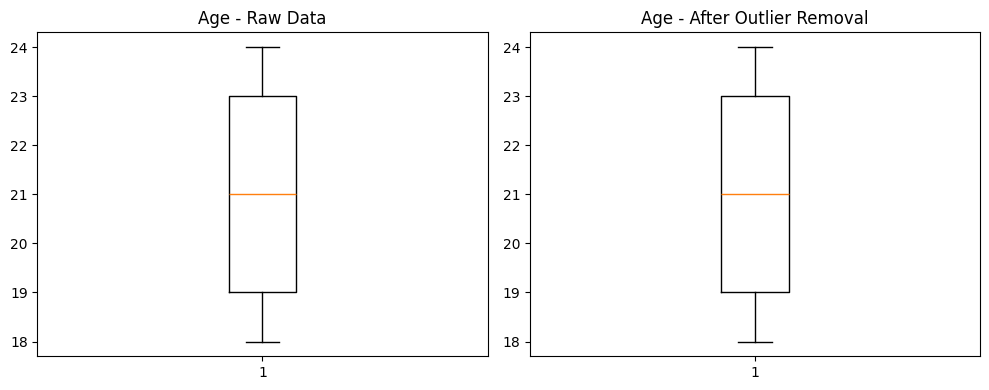

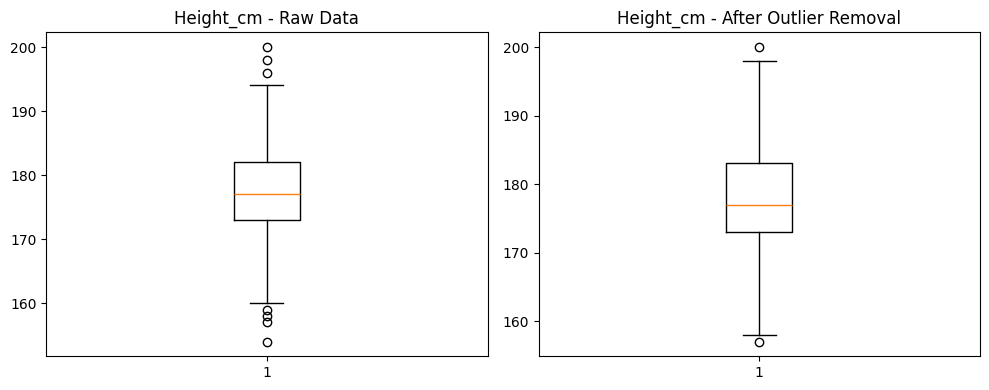

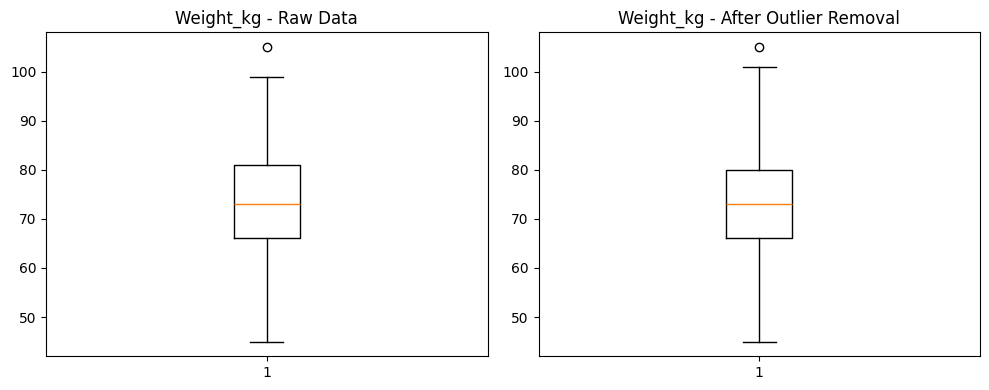

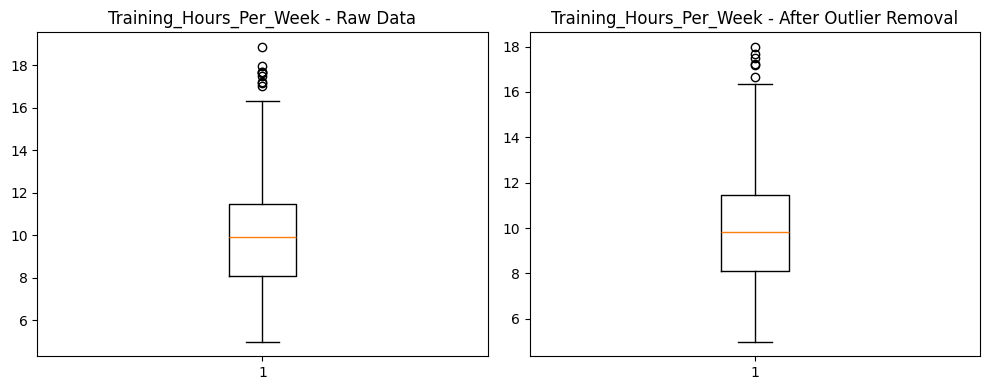

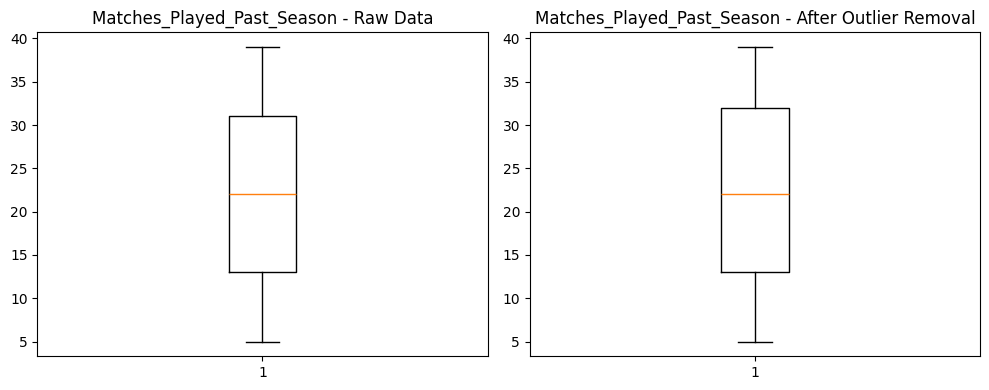

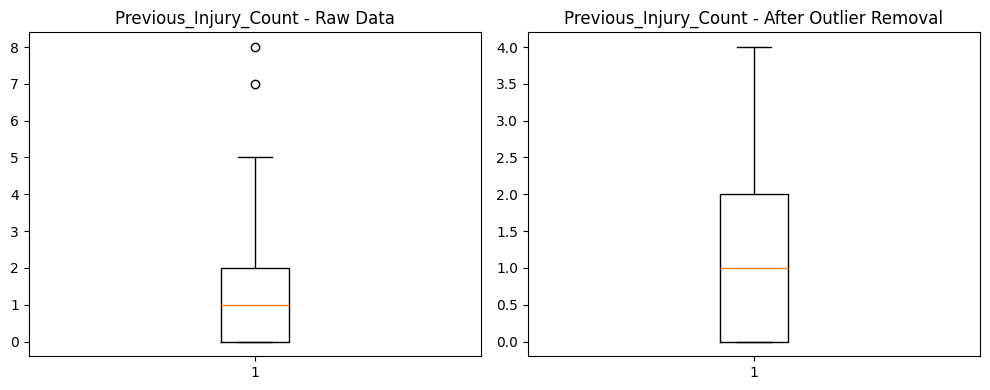

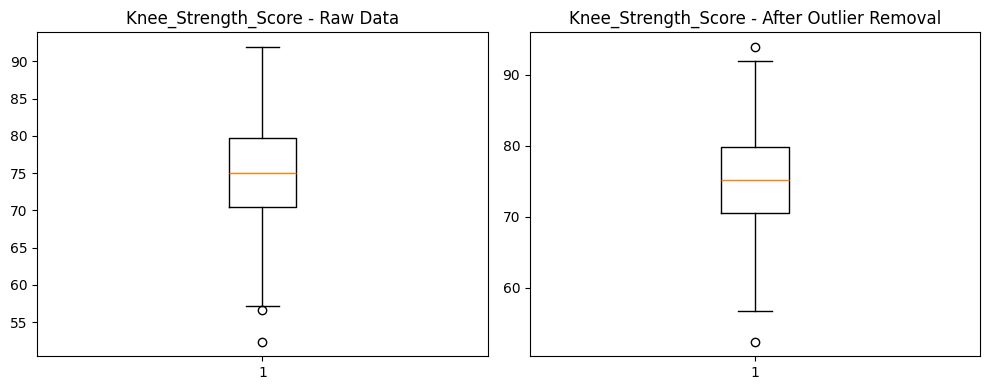

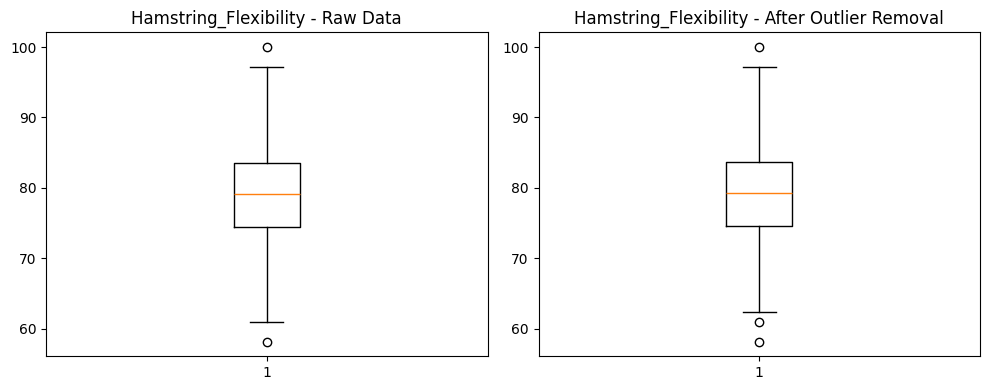

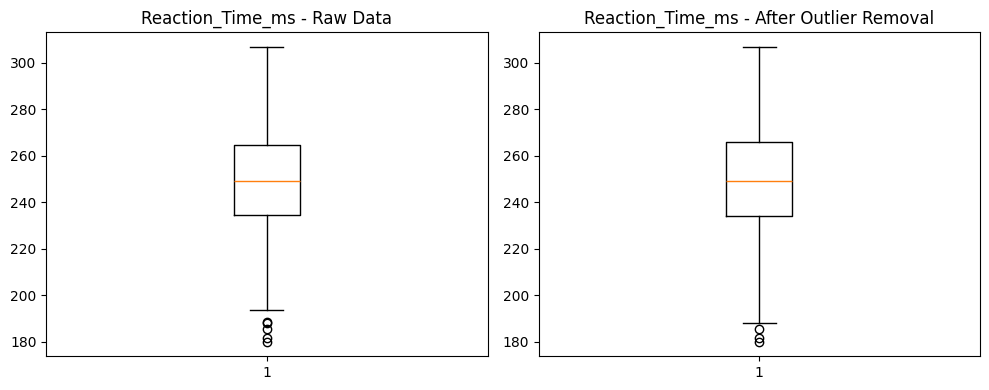

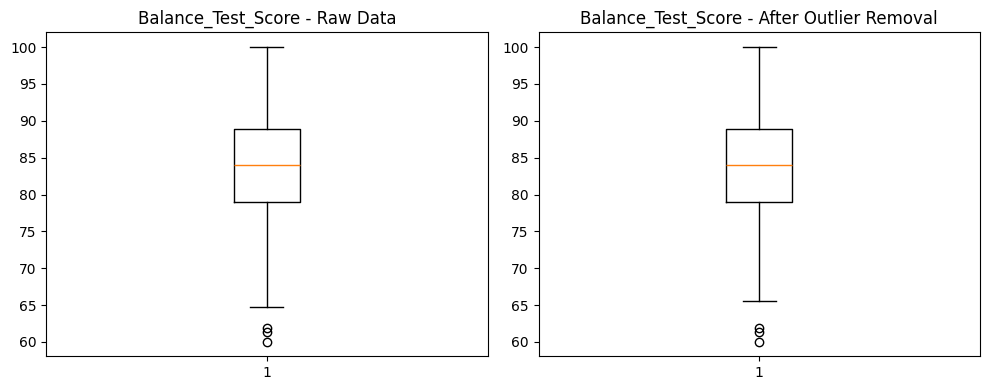

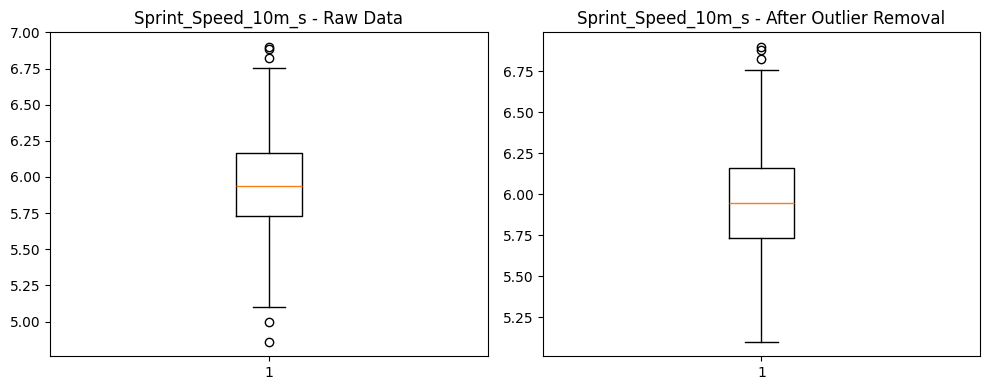

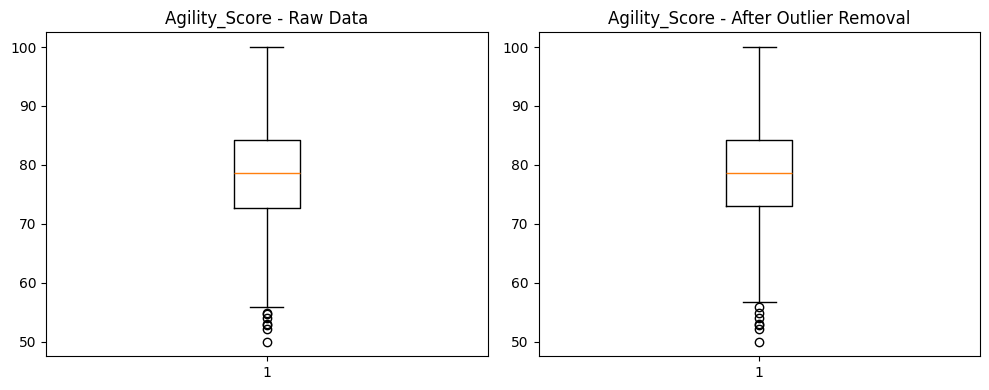

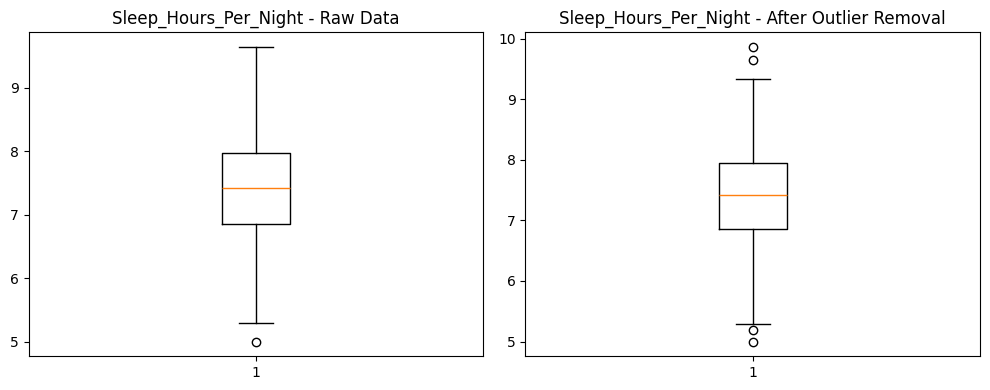

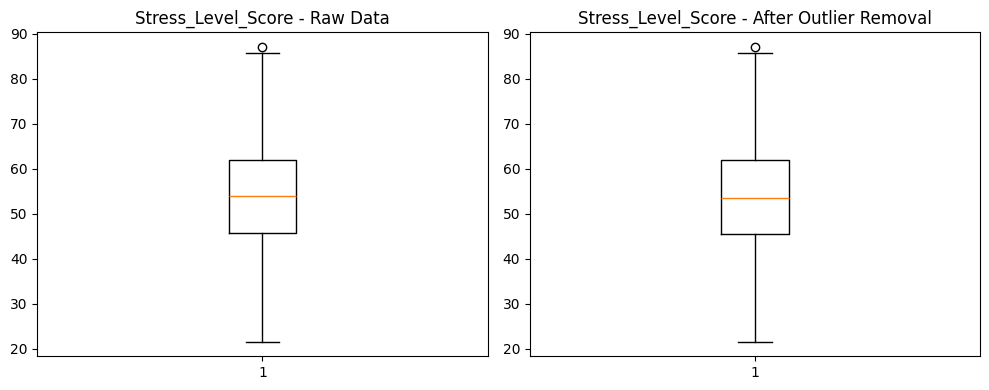

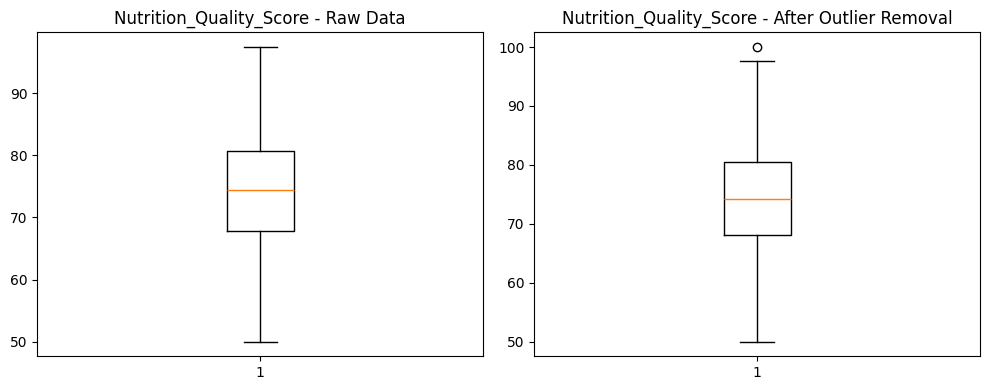

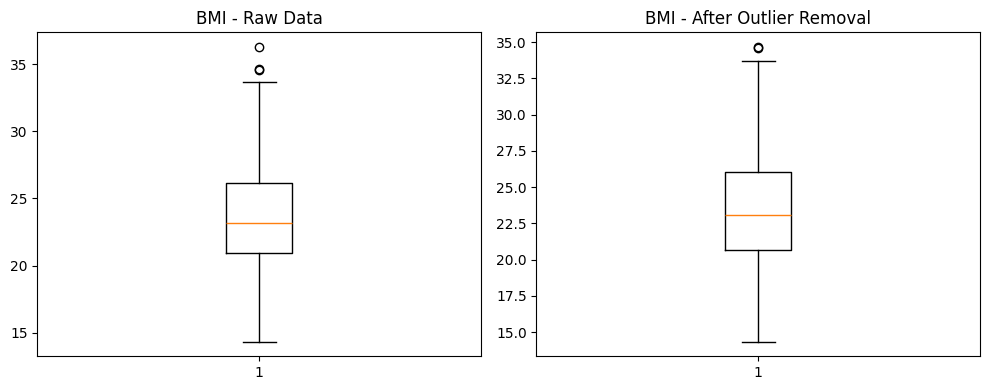

In [20]:

for col in quantitative_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.boxplot(X_train_raw[col].dropna())
    plt.title(f"{col} - Raw Data")

    plt.subplot(1,2,2)
    plt.boxplot(X_train_clean[col].dropna())
    plt.title(f"{col} - After Outlier Removal")

    plt.tight_layout()
    plt.show()


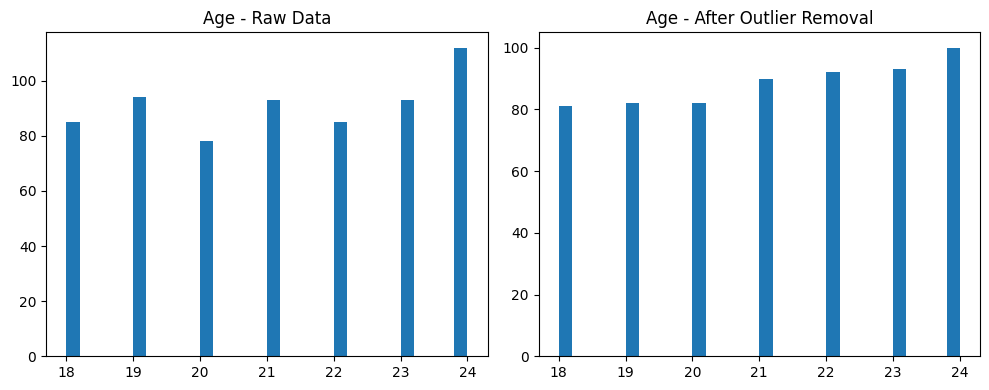

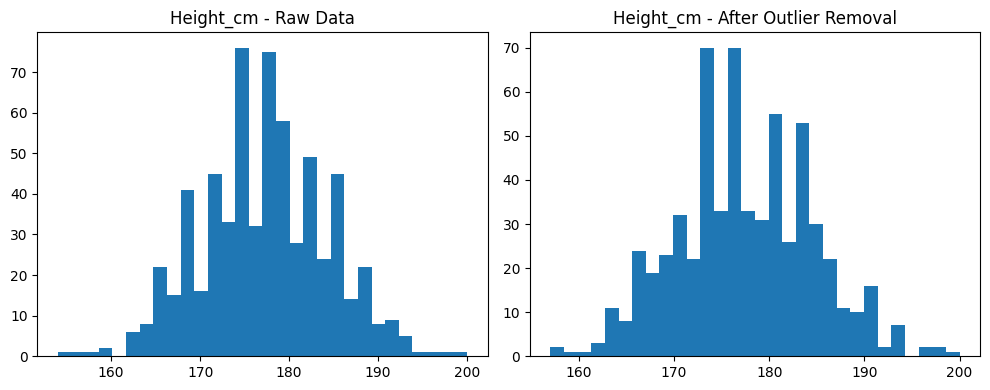

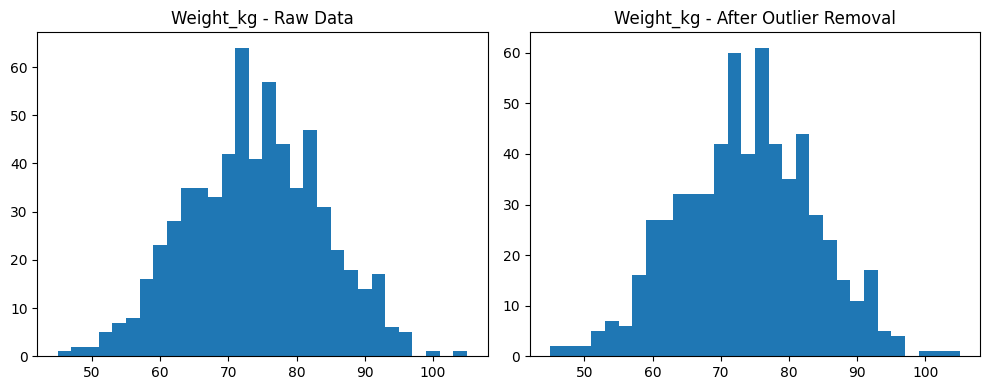

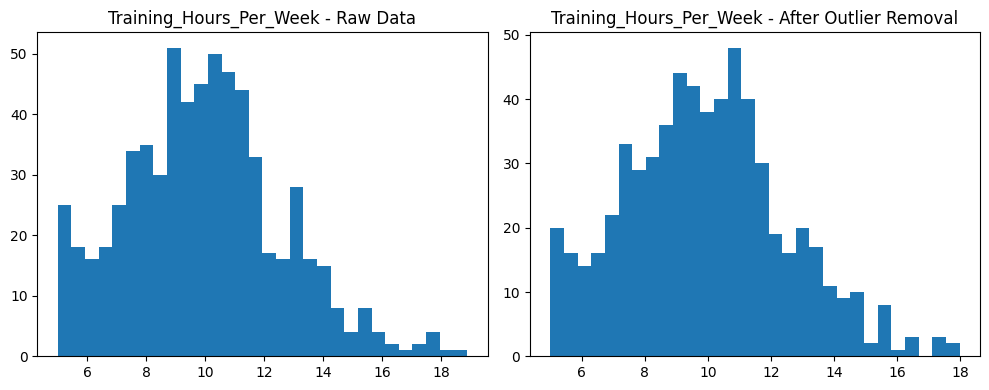

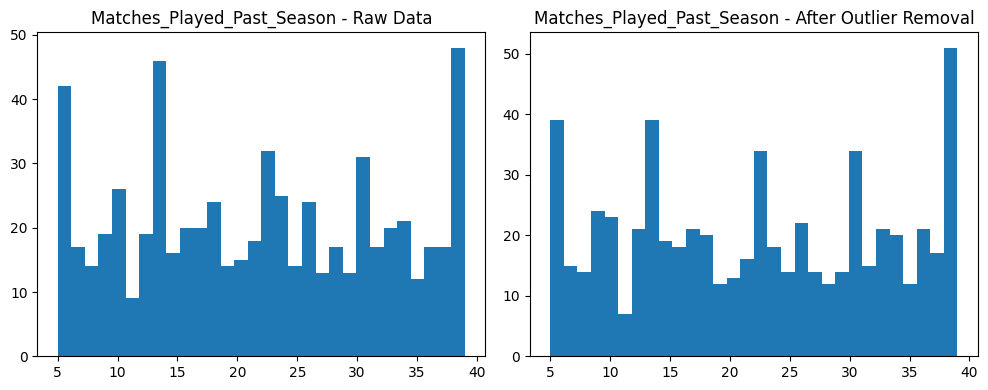

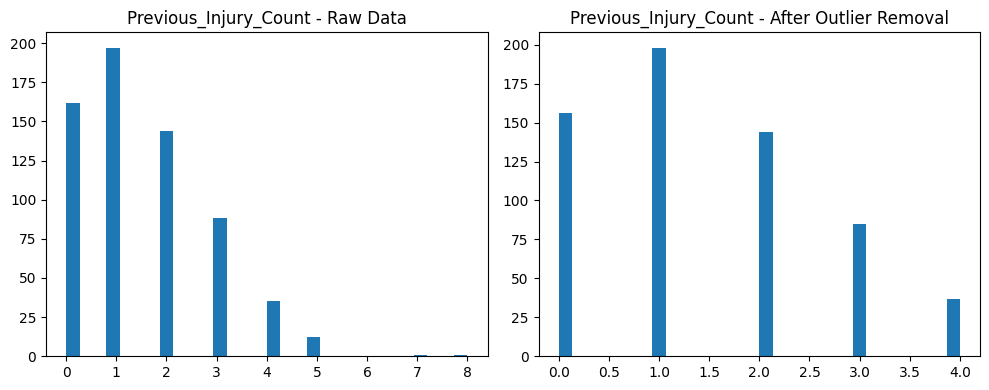

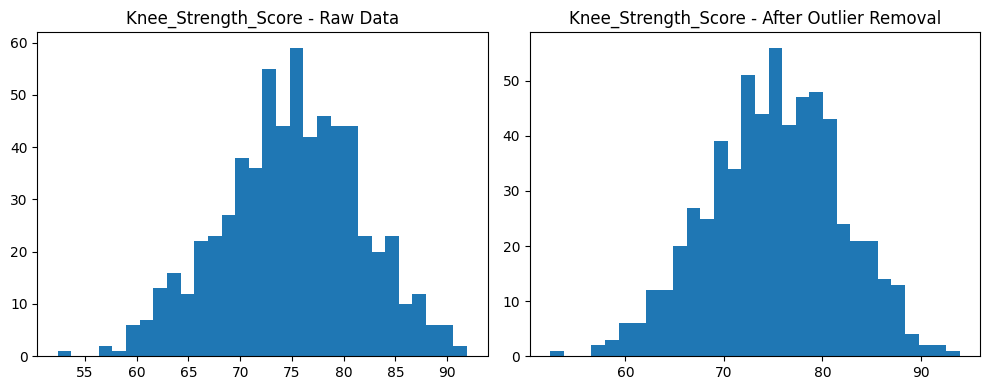

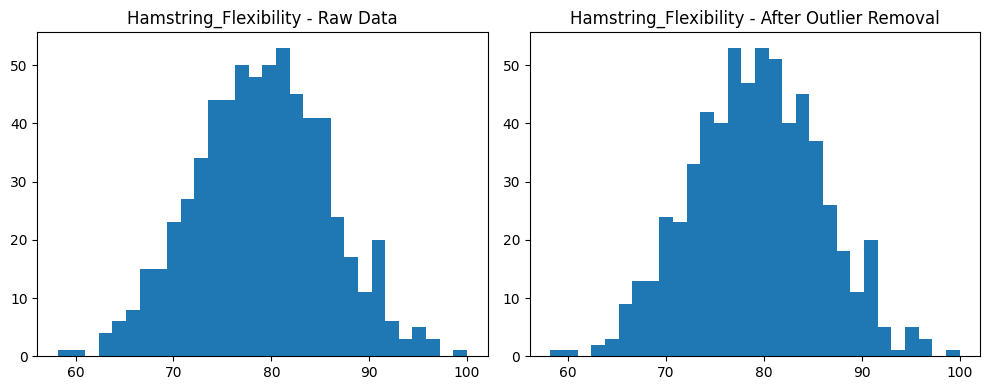

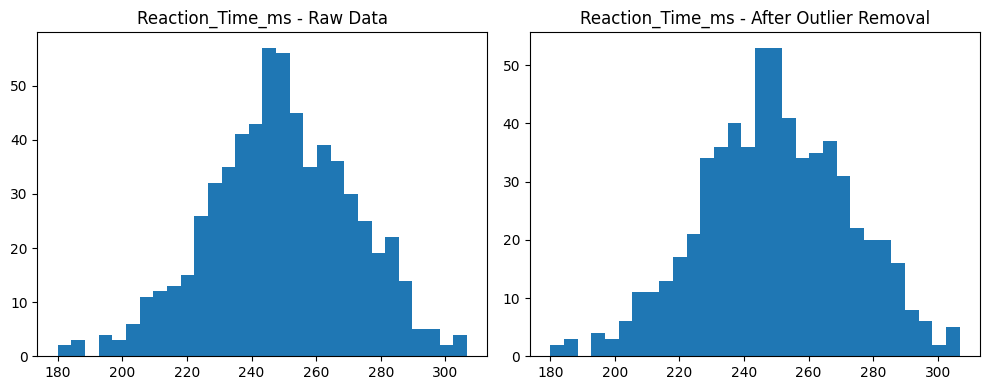

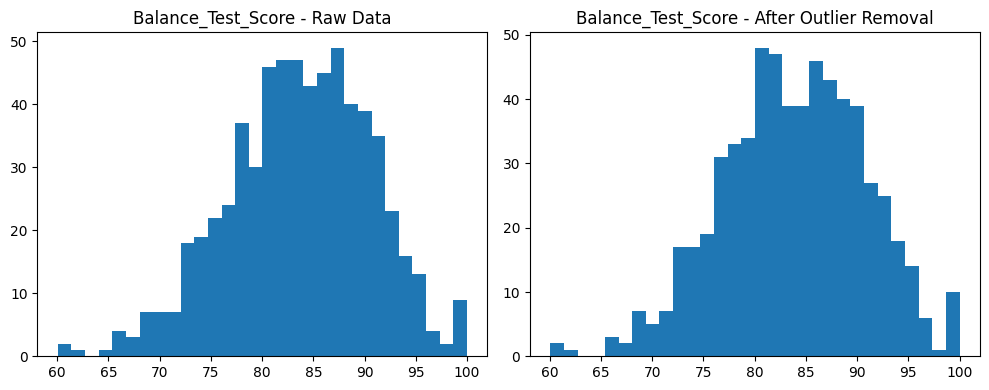

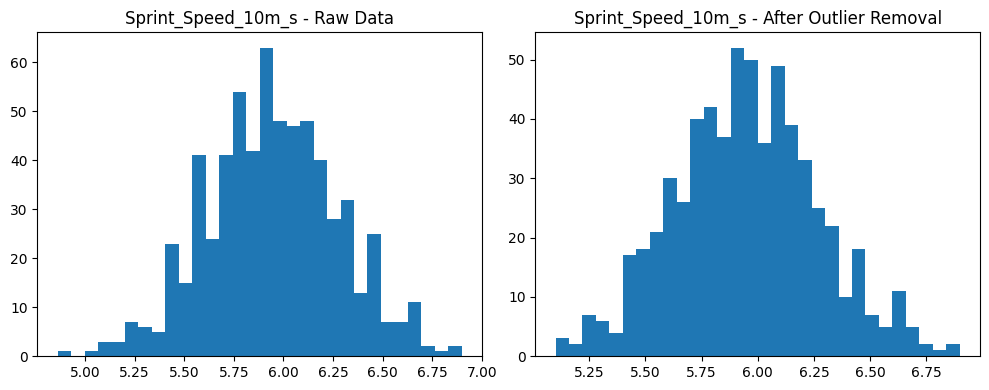

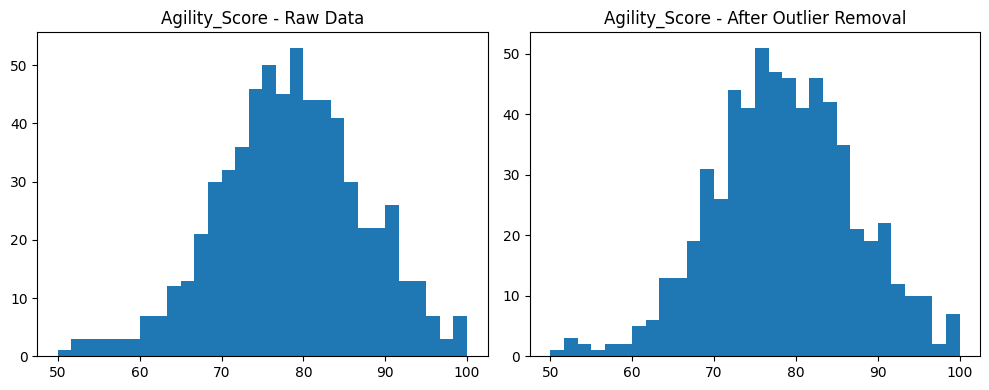

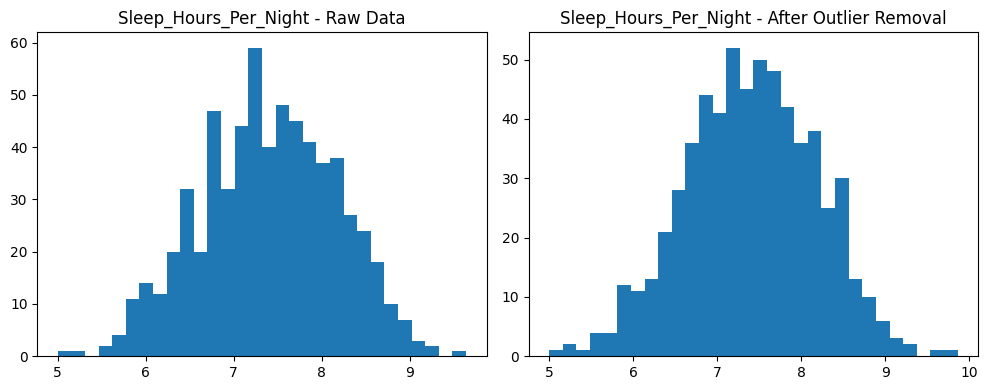

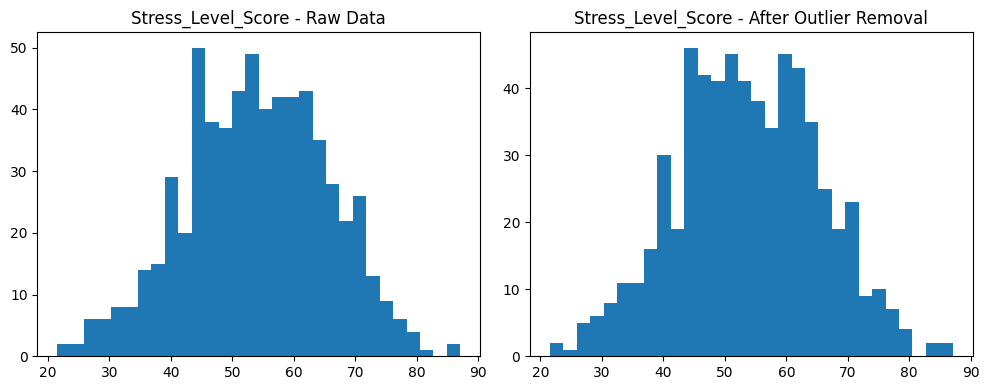

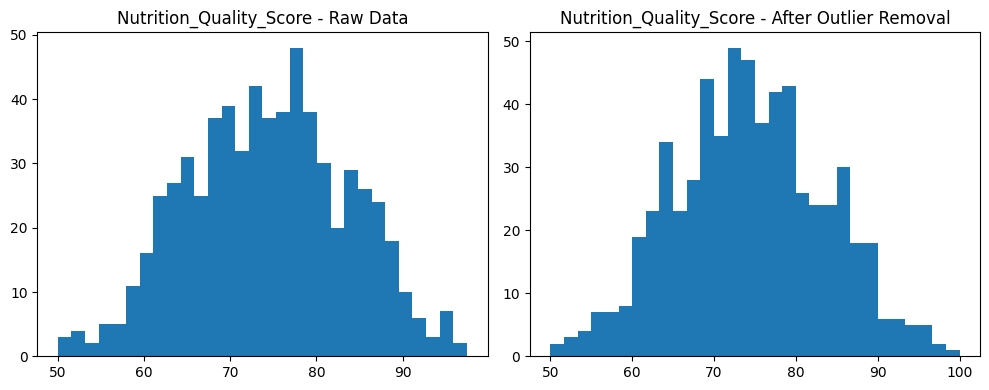

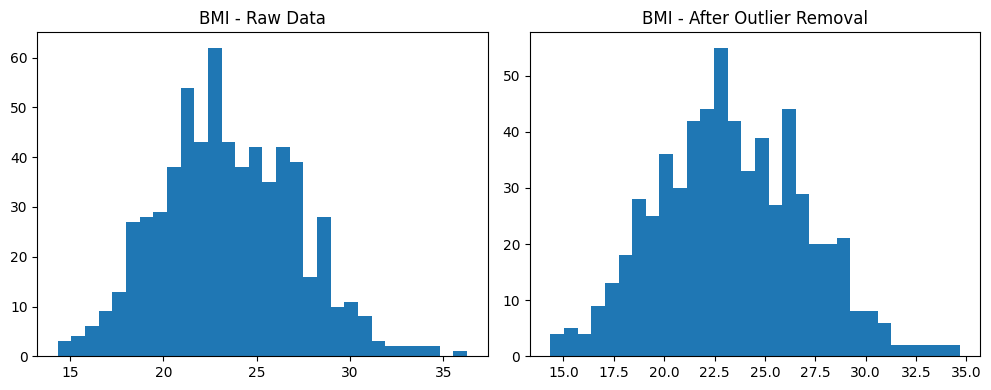

In [21]:
for col in quantitative_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.hist(X_train_raw[col].dropna(), bins=30)
    plt.title(f"{col} - Raw Data")

    plt.subplot(1,2,2)
    plt.hist(X_train_clean[col].dropna(), bins=30)
    plt.title(f"{col} - After Outlier Removal")

    plt.tight_layout()
    plt.show()


### Feature Standardization

For both datasets—the **raw** and the **cleaned**—all quantitative features were standardized using **z-score normalization**.

- **Calculation:**  

$$
z = \frac{x - \mu_{\text{train}}}{\sigma_{\text{train}}}
$$

where $\mu_{\text{train}}$ and $\sigma_{\text{train}}$ are the mean and standard deviation computed from the training subset only.

- The same parameters were applied to transform the respective test sets.  
- Standardization ensures that all features have zero mean and unit variance, improving model training stability and performance.


In [22]:
# Calculate mean and std from the cleaned X_train_clean for quantitative features
mu_clean = X_train_clean[quantitative_cols].mean()
sigma_clean = X_train_clean[quantitative_cols].std()

# Standardize quantitative features in both cleaned training and testing sets
for col in quantitative_cols:
    X_train_clean[col] = (X_train_clean[col] - mu_clean[col]) / sigma_clean[col]
    X_test_clean[col] = (X_test_clean[col] - mu_clean[col]) / sigma_clean[col]

print("\nShape of X_train_clean:", X_train_clean.shape)
print("Shape of X_test_clean:", X_test_clean.shape)
print("Shape of y_train_clean:", y_train_clean.shape)
print("Shape of y_test_clean:", y_test_clean.shape)


Shape of X_train_clean: (620, 18)
Shape of X_test_clean: (156, 18)
Shape of y_train_clean: (620,)
Shape of y_test_clean: (156,)


In [23]:
# Compute μ and σ from RAW TRAINING DATA ONLY
mu_raw = X_train_raw[quantitative_cols].mean()
sigma_raw = X_train_raw[quantitative_cols].std()

# Standardize raw training and testing sets
for col in quantitative_cols:
    X_train_raw[col] = (X_train_raw[col] - mu_raw[col]) / sigma_raw[col]
    X_test_raw[col]  = (X_test_raw[col]  - mu_raw[col]) / sigma_raw[col]

print("\nShape of X_train_raw:", X_train_raw.shape)
print("Shape of X_test_raw:", X_test_raw.shape)
print("Shape of y_train_raw:", y_train_raw.shape)
print("Shape of y_test_raw:", y_test_raw.shape)



Shape of X_train_raw: (640, 18)
Shape of X_test_raw: (160, 18)
Shape of y_train_raw: (640,)
Shape of y_test_raw: (160,)


In [24]:
X_train_raw.shape

(640, 18)

In [25]:
X_test_raw.shape

(160, 18)

In [26]:
X_test_clean.shape

(156, 18)

In [27]:
X_train_clean.shape

(620, 18)

In [28]:
X_train_raw.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,BMI
642,0.912264,0.675174,-1.057843,0,0.175839,-0.566820,-0.388334,1.547107,1.833778,0.606037,0.158762,-0.110384,-0.144634,-0.167908,-0.508731,-0.361479,0,-1.221863
310,1.401250,1.664312,0.161280,2,-1.199050,0.985530,0.378746,-0.499331,-1.602931,0.166117,-1.142364,-1.519977,1.620669,-2.189874,0.824300,-1.054985,1,-0.680533
583,-0.065707,0.957785,0.364467,0,3.404421,0.888508,0.378746,-1.647028,0.238112,-0.391193,0.290091,-0.023150,-0.233197,-0.387840,0.815553,-0.914635,0,-0.201995
586,-0.554693,1.381701,-0.854656,0,0.628719,1.179574,-0.388334,2.143347,0.532225,0.267746,1.897391,-0.652662,1.013129,-0.422909,-1.067774,1.607993,0,-1.340051
626,-1.043679,-0.313963,1.278809,0,1.483504,-0.372776,-0.388334,0.949189,0.740084,-3.095609,0.760108,1.124487,1.301757,0.303368,-2.088941,0.428419,1,1.259980


In [29]:
X_test_raw.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,BMI
295,-1.043679,0.533869,0.059686,0,0.660595,0.500421,0.378746,-0.542422,-1.361749,0.072966,0.627360,1.757061,0.900600,-1.959758,1.026141,-2.167219,0,-0.244595
522,0.423278,-0.455268,-0.041907,0,0.420325,0.112333,-0.388334,1.956033,0.890202,-1.158072,1.804311,1.366291,-0.006705,-0.377995,-1.068036,-0.001429,0,0.172690
629,-0.554693,0.816480,-0.245094,0,0.101655,1.664683,0.378746,1.320981,0.651969,0.497653,1.313110,-0.997078,0.965435,0.331453,-0.155460,1.236527,1,-0.624407
632,0.423278,0.109953,1.278809,1,-0.934402,0.112333,1.912905,-0.824573,0.096372,-0.874263,-0.333706,0.571237,-0.640159,0.335005,-0.365839,-0.688510,0,1.002929
428,-0.554693,0.109953,0.161280,3,0.818044,-0.081711,-1.155414,-0.328180,-1.049806,0.776356,0.853579,-1.185333,1.649242,0.217137,-0.517763,0.548235,0,0.052119


In [30]:
X_train_clean.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,BMI
393,0.925571,0.215554,1.192089,1,0.035736,0.557308,0.481339,-0.012021,1.605272,-0.003197,-0.334440,-1.251000,0.747415,-1.143520,0.225818,-0.375589,1,0.859426
227,0.427001,-1.472571,-0.226714,1,-0.128363,-1.255250,0.481339,0.037942,-2.077574,-0.220682,-0.465751,-1.544521,-1.174323,-0.448656,0.820347,-0.286812,0,0.568483
611,-0.570139,0.778262,-0.226714,0,0.119006,1.606683,0.481339,1.294421,0.643648,0.463460,1.297148,-1.021697,0.978580,0.319766,-0.138674,1.236596,1,-0.588578
695,0.427001,-0.487832,0.685374,1,-0.052401,1.606683,-1.219117,1.225751,0.583338,0.548192,0.832016,-1.358745,1.136860,0.015300,0.497683,0.480190,1,0.830904
639,-1.068709,-0.347155,-0.733430,2,-0.708581,1.320490,-0.368889,0.082805,-0.015970,-1.804867,1.398577,0.334017,-1.096439,1.008816,-0.776875,0.073001,0,-0.493441


In [31]:
X_test_clean.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,BMI
44,-0.570139,-0.206478,0.989403,2,-0.584556,0.080319,0.481339,1.148129,0.775577,-0.316309,2.058454,-0.171685,0.466764,-0.880730,1.256749,1.799822,1,0.931841
428,-0.071569,0.356231,-0.936116,2,-0.091574,-0.873659,1.331566,-1.021839,0.668882,-0.912217,-1.227329,-1.606754,-0.422372,0.880159,0.366789,-0.233100,0,-0.982115
165,-1.068709,1.481647,2.205520,3,0.638279,-1.446045,-1.219117,0.773336,0.786936,-1.059856,0.061134,0.068750,1.401889,0.276177,0.135634,1.938170,1,0.954601
351,-1.567279,-0.628509,-0.834773,3,-0.046154,-0.205875,-1.219117,0.851801,-0.910262,-1.922867,-0.348115,-0.753215,0.940586,1.628462,-0.384272,0.598812,0,-0.448039
108,0.427001,1.059616,1.698805,2,-0.226095,0.271114,-1.219117,-0.310233,1.162005,-0.508568,2.050568,-1.213378,-0.969054,1.313983,0.790995,-0.317059,0,0.796385


# Statisical Analysis & Visualization

In [32]:
from scipy.stats import shapiro
import pandas as pd


train_df_clean_original = X_train_clean.copy()
for col in quantitative_cols:
    train_df_clean_original[col] = [x * sigma_clean[col] + mu_clean[col] for x in X_train_clean[col]]


train_df_clean = train_df_clean_original.copy()

print("Training dataset shape (cleaned, original scale):", train_df_clean.shape)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
train_df_clean



Training dataset shape (cleaned, original scale): (620, 18)


,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,BMI
393,23.0,179.0,85.0,1,10.004360,28.0,2.0,74.993164,89.821411,249.550333,81.486297,5.545695,85.000979,6.514052,56.423122,70.974298,1,26.528510
227,22.0,167.0,71.0,1,9.585843,9.0,2.0,75.329695,65.440925,244.560915,80.572844,5.451012,68.390109,7.057034,63.324602,71.790933,0,25.458066
611,20.0,183.0,71.0,0,10.216731,39.0,2.0,83.792825,83.455448,260.256160,92.836345,5.619662,86.999094,7.657497,52.191993,85.804312,1,21.200991
695,22.0,174.0,80.0,1,9.779575,39.0,0.0,83.330292,83.056191,262.200036,89.600685,5.510939,88.367220,7.419579,59.579021,78.846354,1,26.423570
639,19.0,175.0,66.0,2,8.106053,36.0,1.0,75.631877,79.088770,208.217331,93.541933,6.056982,69.063317,8.195936,44.783560,75.100747,0,21.551020
190,23.0,177.0,83.0,0,5.781941,37.0,4.0,68.567013,60.928159,278.893799,76.097455,5.986472,73.922067,7.617377,68.885235,72.873588,0,26.493026
354,18.0,174.0,80.0,1,8.865564,16.0,0.0,80.393170,85.704529,238.987502,85.967894,6.175684,93.420373,6.352859,47.617654,81.068676,1,26.423570
220,18.0,177.0,85.0,0,6.341609,15.0,0.0,73.324994,85.000509,241.121668,89.242528,6.010937,93.256378,7.654946,37.799481,74.506914,0,27.131412
747,21.0,175.0,73.0,1,11.937662,19.0,1.0,77.726222,79.603033,254.068128,91.528744,6.010965,71.008062,6.913015,59.347781,69.854251,0,23.836735
48,23.0,169.0,58.0,2,6.405263,24.0,1.0,87.440295,75.839151,228.267520,89.445116,6.521814,71.924438,6.428359,44.107661,86.340697,1,20.307412


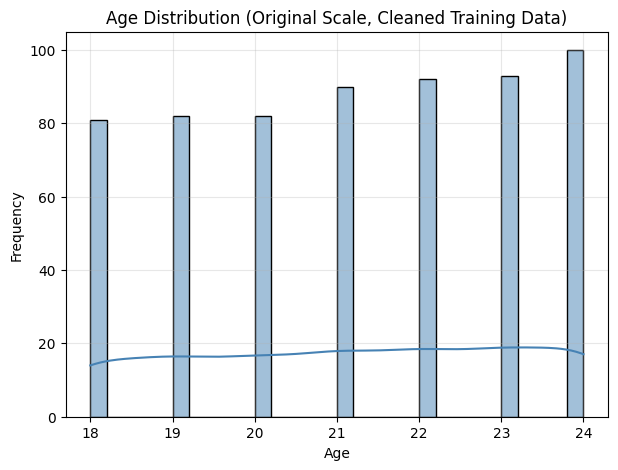

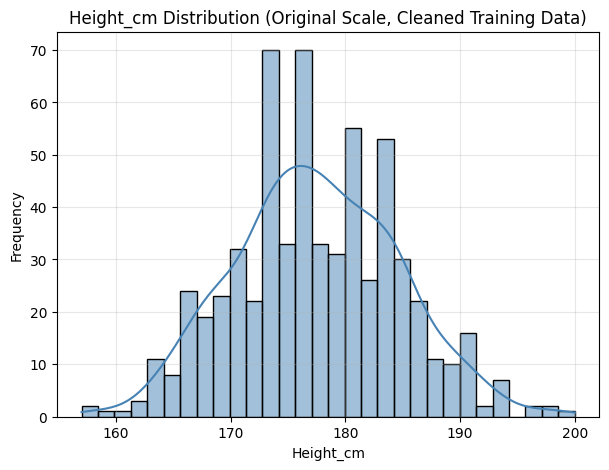

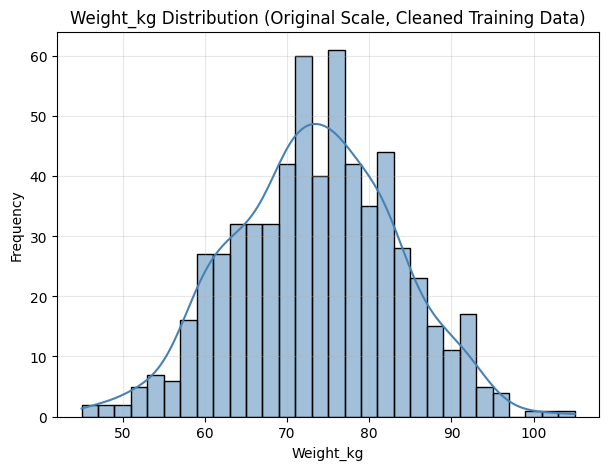

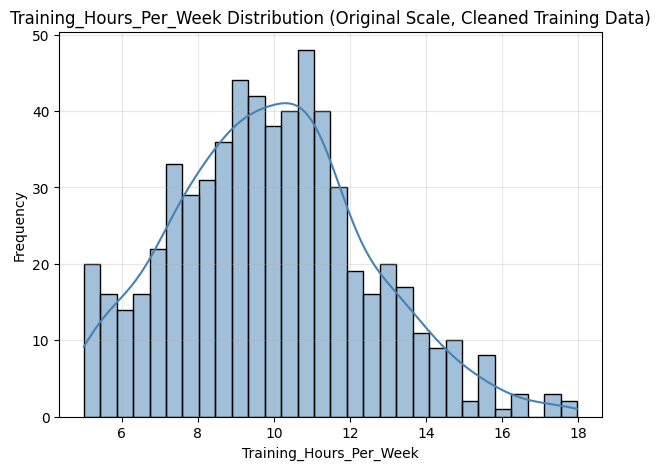

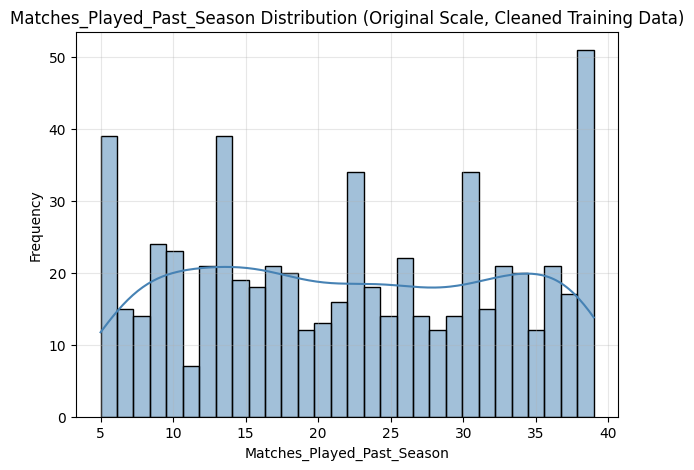

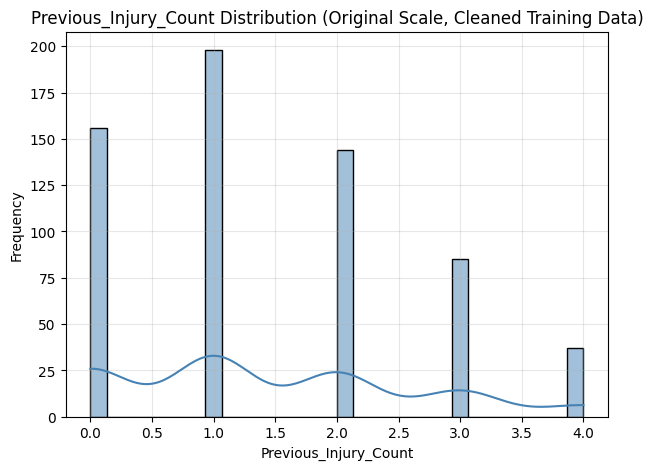

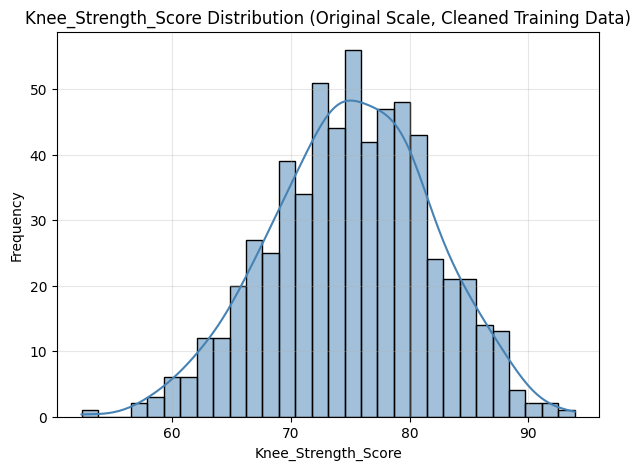

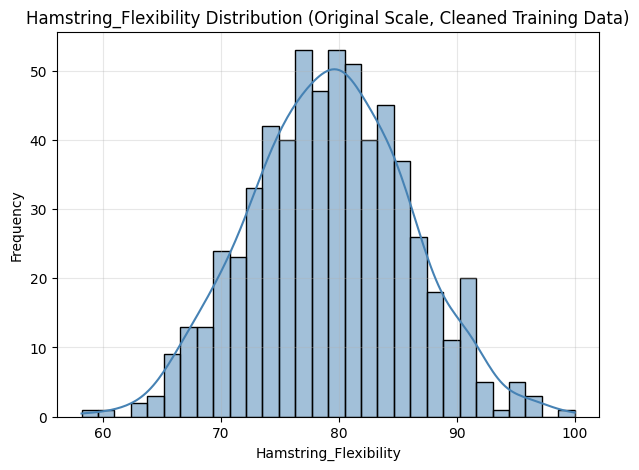

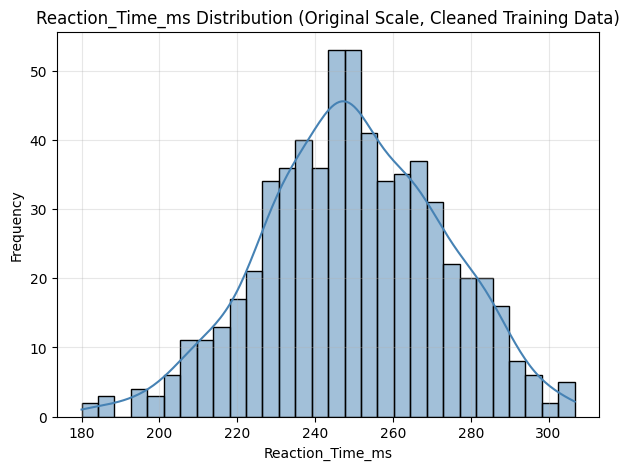

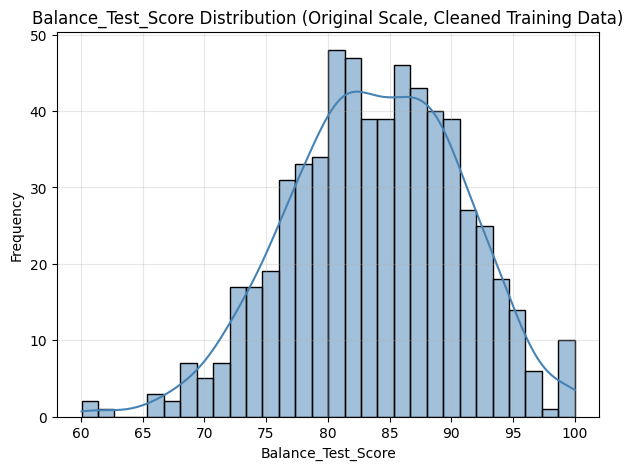

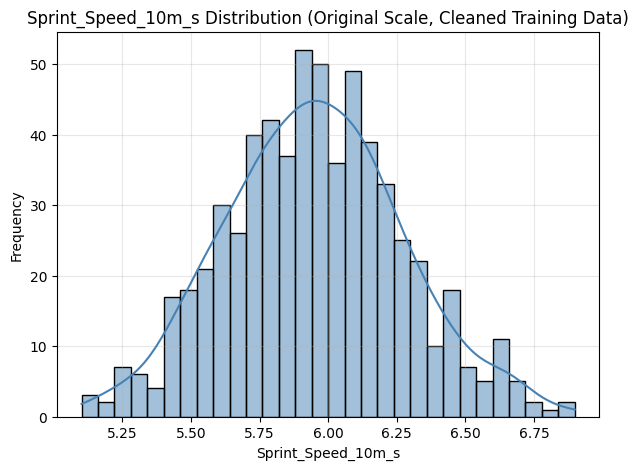

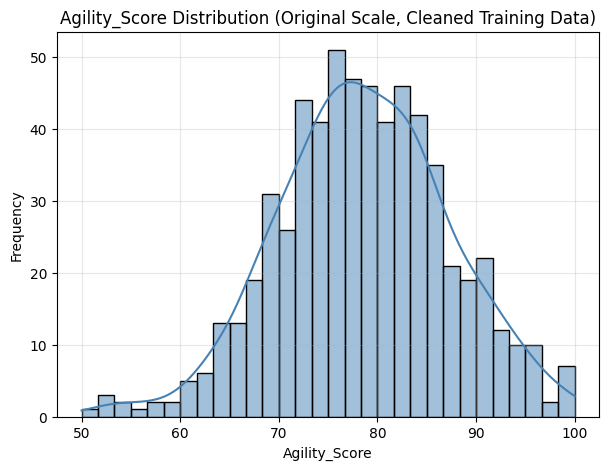

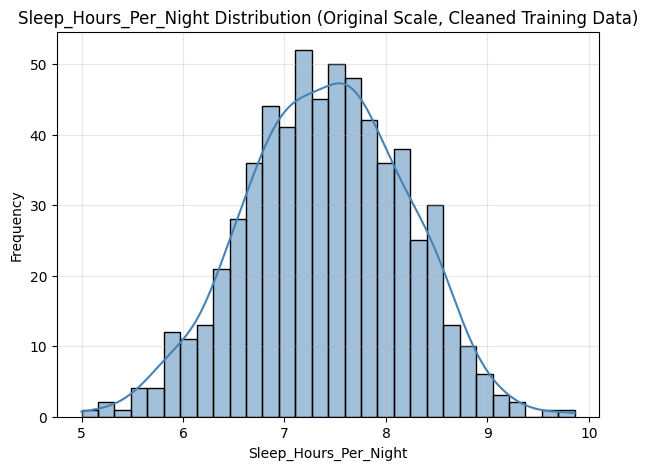

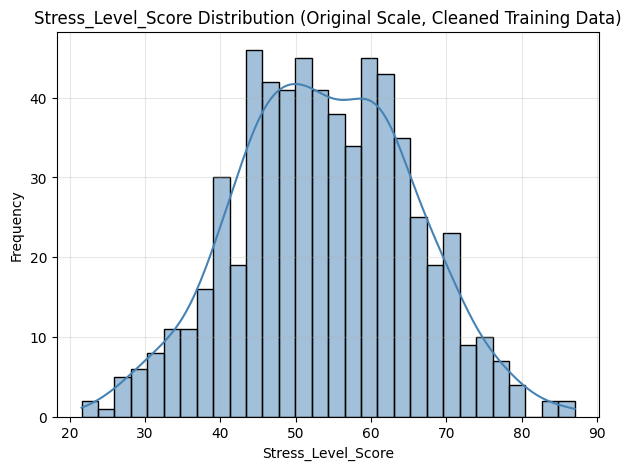

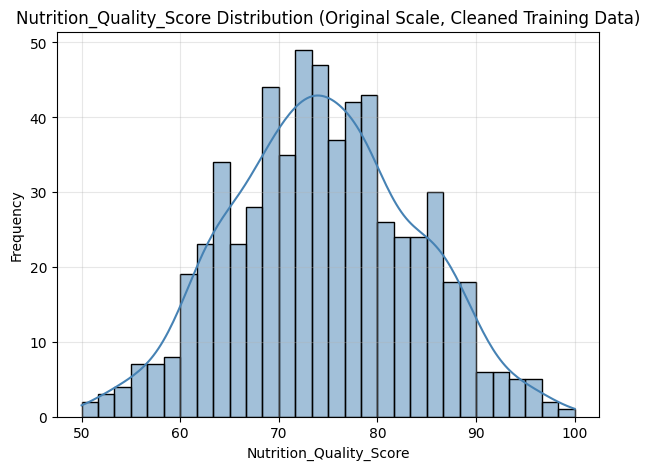

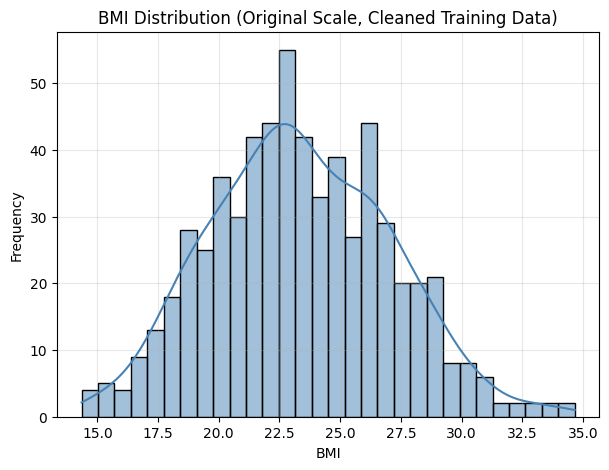

In [33]:


import matplotlib.pyplot as plt
import seaborn as sns

for col in quantitative_cols:
    plt.figure(figsize=(7,5))
    sns.histplot(train_df_clean[col], bins=30, kde=True, color='steelblue', edgecolor='black')
    plt.title(f'{col} Distribution (Original Scale, Cleaned Training Data)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(alpha=0.3)
    plt.show()


**Age distribution:**
Uniform

This is discrete data. It seems like most values have almost equal frequencies. The values around 18 and 24 might have slightly lower and higher frequencies respectively, but overall the distribution appears approximately uniform with no clear central peak.

**Height distribution:**
Gaussian

The highest frequency is roughly located around the middle value (around 175). One thing to notice is that the right tail appears slightly thicker than the left, which suggests a mild right skew. However, since most of the data is concentrated around the center, the distribution can still be considered approximately Gaussian.

**Weight distribution:**
Gaussian

The distribution looks mostly normal. There are slight irregularities that make the curve a bit uneven, but not enough to consider it multimodal. It is noticeable that around 60 kg and 80 kg there are slightly higher frequencies, although the main peak still lies in the middle. The right side also seems to have slightly higher frequencies than the left, indicating a mild right skew.

**Training hours per week distribution:**
Slightly right-skewed

The peak of the distribution is slightly shifted toward lower values, while the right tail extends further. This indicates a mildly right-skewed distribution rather than a perfectly symmetric one.

**Matches played past season distribution:**
Uniform / irregular

This is discrete data. By observing the histogram, the distribution appears relatively uniform, with some values having slightly higher frequencies than others. Since the data is discrete and does not show a clear central peak, it does not strongly follow a standard parametric distribution. It could also be interpreted as having irregular or weak multimodal behavior.

**Previous injury count distribution:**
Right-skewed

This is discrete data. Most of the observations are concentrated at lower values, while fewer observations occur at higher values. This results in a right-skewed distribution.

**Knee strength score distribution:**
Gaussian

The distribution appears mostly normal, with a clear central peak. The tails are slightly heavier, and there may be a small right shift in the peak, but these deviations are minor and the distribution can be reasonably approximated as Gaussian.

**Hamstring flexibility distribution:**
Gaussian

This distribution is approximately Gaussian. The curve appears slightly thicker than a perfect normal distribution, suggesting somewhat heavier tails, but it remains symmetric and unimodal.

**Reaction time distribution:**
Approximately Gaussian

The distribution is unimodal and fairly symmetric. The peak appears somewhat sharp and the shape looks slightly triangular rather than perfectly bell-shaped. Despite this, it is still reasonable to approximate the distribution as Gaussian.

**Balance test score distribution:**
Slightly right-skewed

The peak lies near the center, but the right side of the distribution has noticeably higher frequencies and a longer tail compared to the left. This indicates a mild right skew.

**Speed sprint distribution:**
Gaussian

The peak is clearly located in the middle of the distribution. While the tails appear slightly heavier than those of a perfect normal distribution, the overall shape is symmetric and approximately Gaussian.

**Agility score distribution:**
Gaussian

This feature shows a central peak with heavier tails. The distribution is symmetric and unimodal, making it reasonably well-approximated by a Gaussian distribution.

**Sleep hours per night distribution:**
Gaussian

The peak lies in the middle of the distribution. The curve appears slightly wider and shorter than a perfect normal distribution, but the overall shape remains symmetric and unimodal.


**Stress level score distribution:**
Gaussian

This distribution appears very close to a normal distribution. The only noticeable difference is slightly heavier tails, but the symmetry and central peak strongly support a Gaussian approximation.

**Nutrition quality score distribution:**
Gaussian with minor secondary peak

The main peak lies in the center of the distribution. However, between the 80–90 range, the frequencies are slightly higher than expected for a perfectly normal curve. This creates a small secondary peak, although the distribution is still largely Gaussian.

**BMI distribution:**
Approximately Gaussian

The distribution is unimodal and fairly symmetric. It resembles the previous feature, with a main peak and a smaller secondary elevation, giving it a somewhat triangular appearance. Despite this, it can still be considered approximately Gaussian.

In [34]:
from scipy.stats import shapiro

print("Shapiro-Wilk Normality Test (Training Data without Outliers)\n")

alpha = 0.05  # significance level

for col in quantitative_cols:
    # Extract the training data for this feature (original scale)
    data = train_df_clean[col]

    # Shapiro-Wilk test
    stat, p_value = shapiro(data)

    print(f"Feature: {col}")
    print(f"  Test statistic = {stat:.4f}")
    print(f"  p-value = {p_value:.4f}")

    # Interpretation
    if p_value < alpha:
        print("  → Reject H₀: The data is NOT normally distributed\n")
    else:
        print("  → Fail to reject H₀: The data is approximately normal\n")


Shapiro-Wilk Normality Test (Training Data without Outliers)

Feature: Age
  Test statistic = 0.9162
  p-value = 0.0000
  → Reject H₀: The data is NOT normally distributed

Feature: Height_cm
  Test statistic = 0.9964
  p-value = 0.1673
  → Fail to reject H₀: The data is approximately normal

Feature: Weight_kg
  Test statistic = 0.9971
  p-value = 0.3412
  → Fail to reject H₀: The data is approximately normal

Feature: Training_Hours_Per_Week
  Test statistic = 0.9891
  p-value = 0.0002
  → Reject H₀: The data is NOT normally distributed

Feature: Matches_Played_Past_Season
  Test statistic = 0.9446
  p-value = 0.0000
  → Reject H₀: The data is NOT normally distributed

Feature: Previous_Injury_Count
  Test statistic = 0.8876
  p-value = 0.0000
  → Reject H₀: The data is NOT normally distributed

Feature: Knee_Strength_Score
  Test statistic = 0.9977
  p-value = 0.5403
  → Fail to reject H₀: The data is approximately normal

Feature: Hamstring_Flexibility
  Test statistic = 0.9990
  p

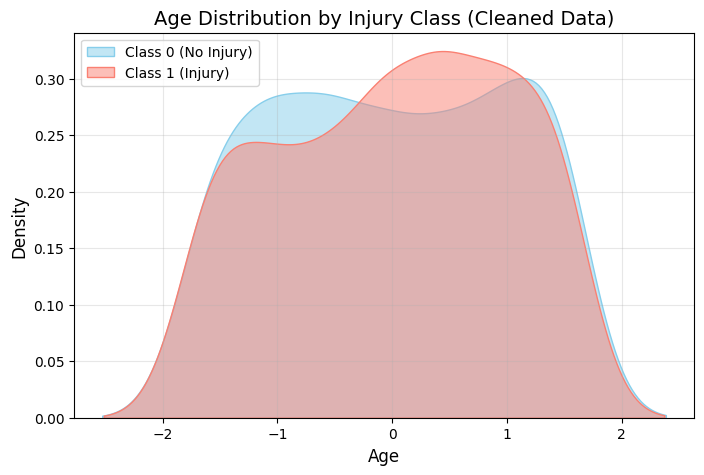

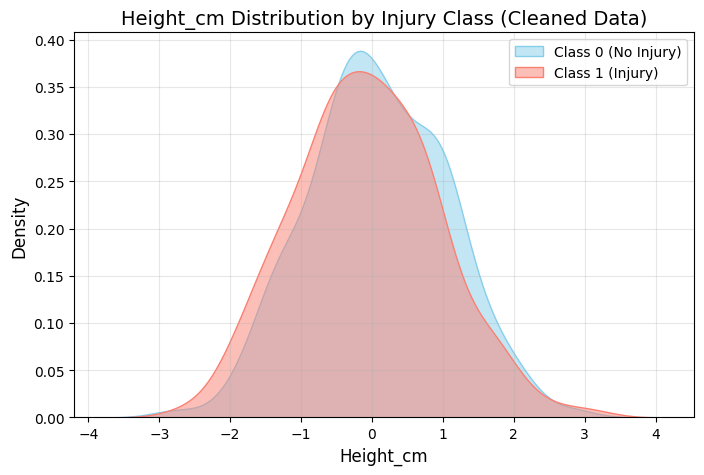

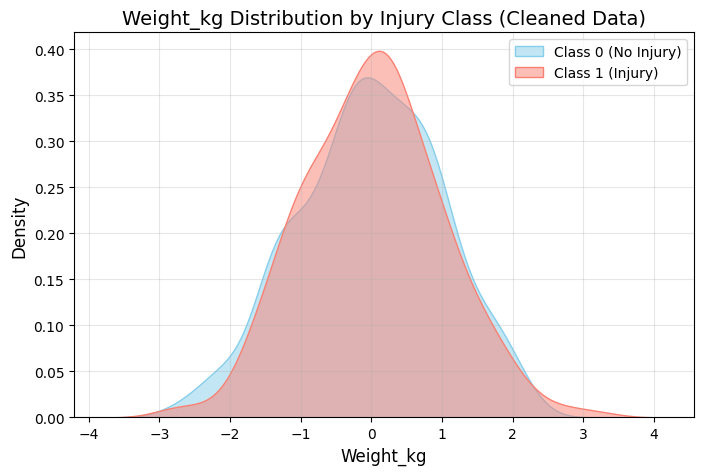

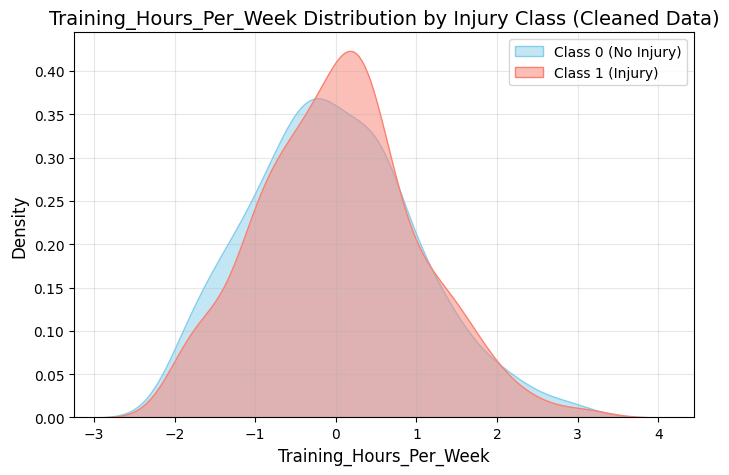

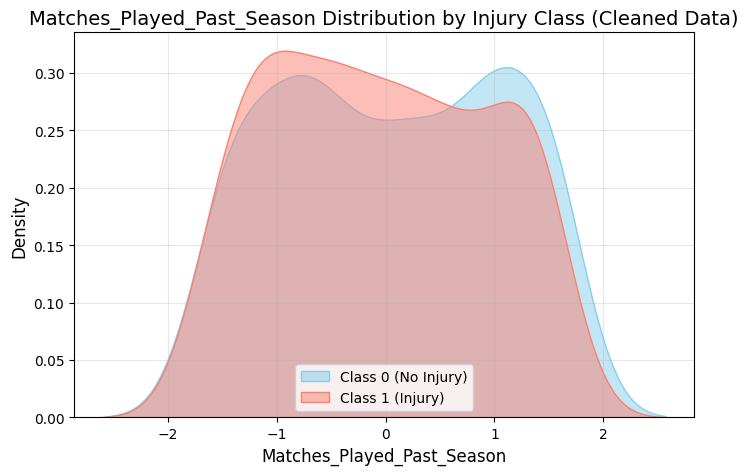

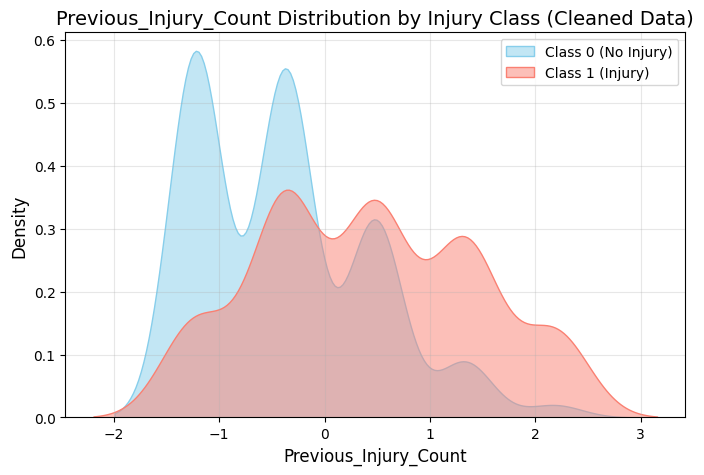

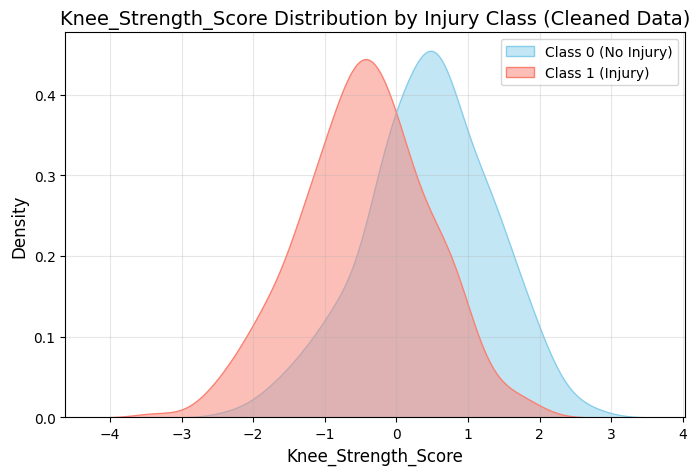

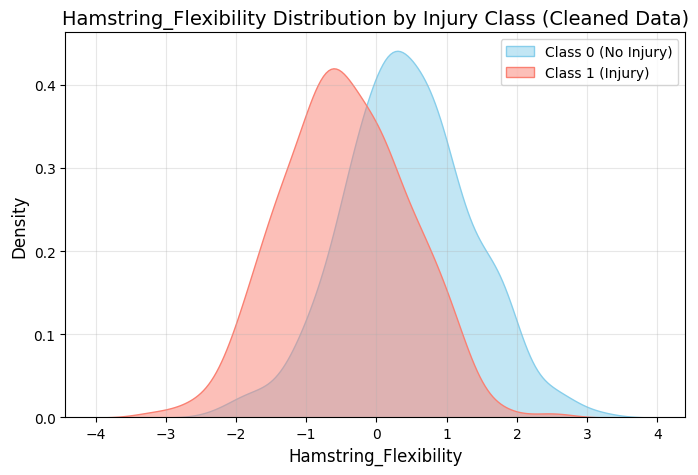

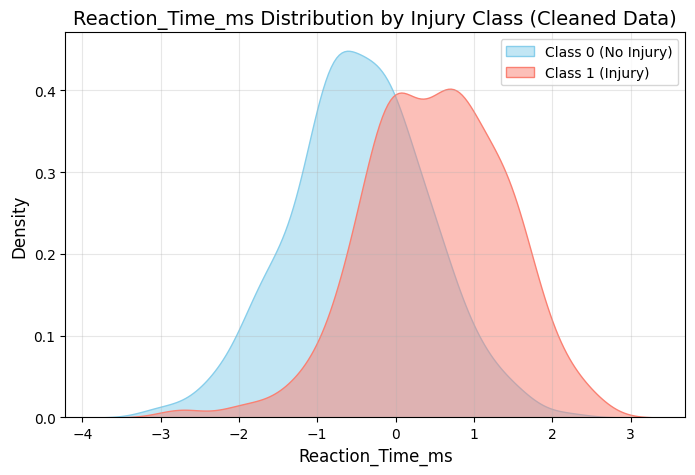

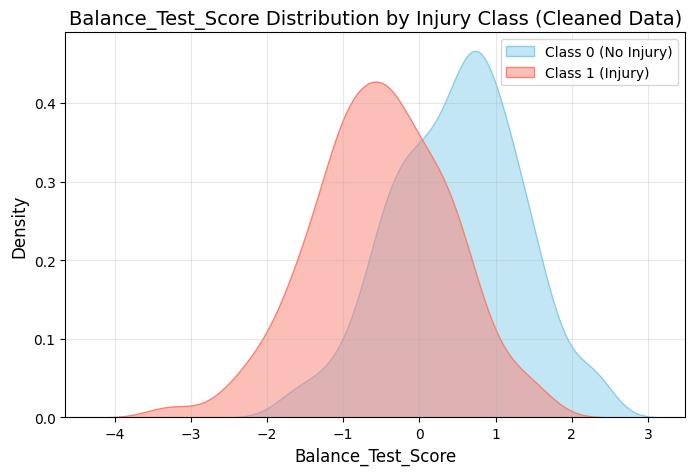

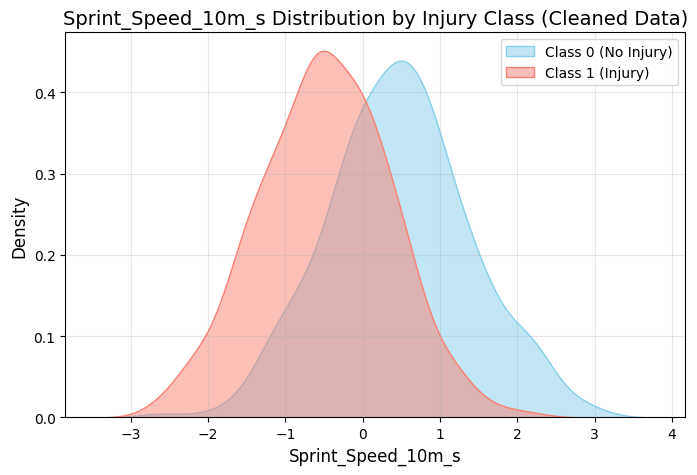

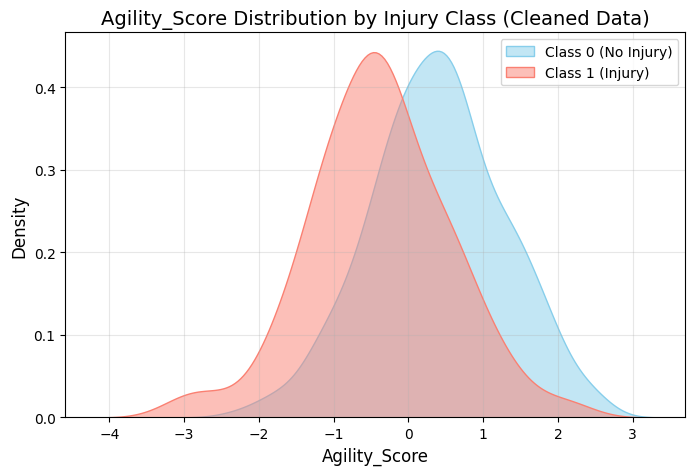

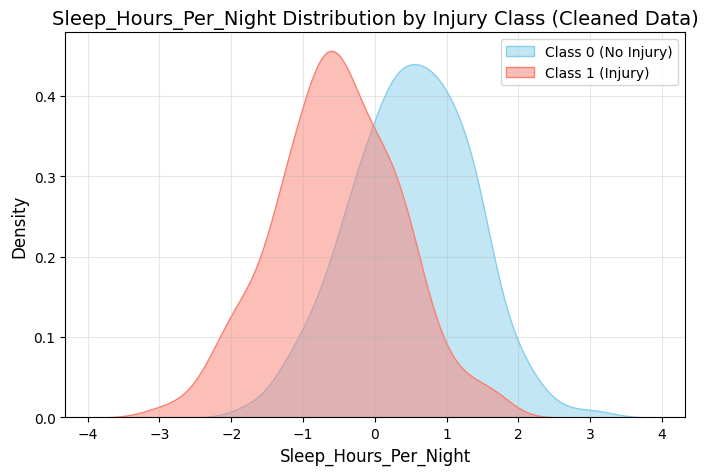

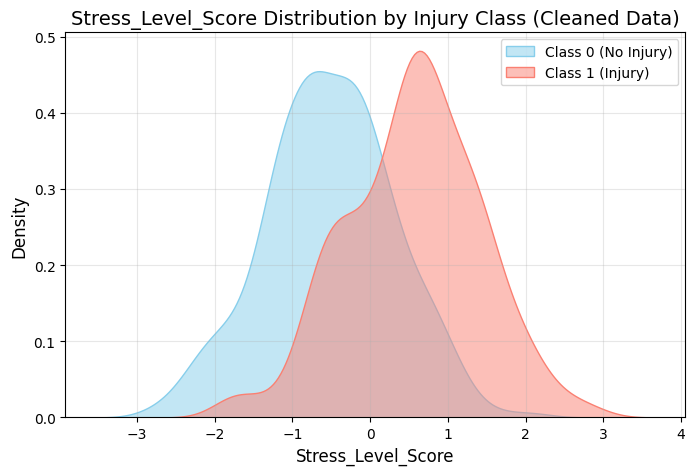

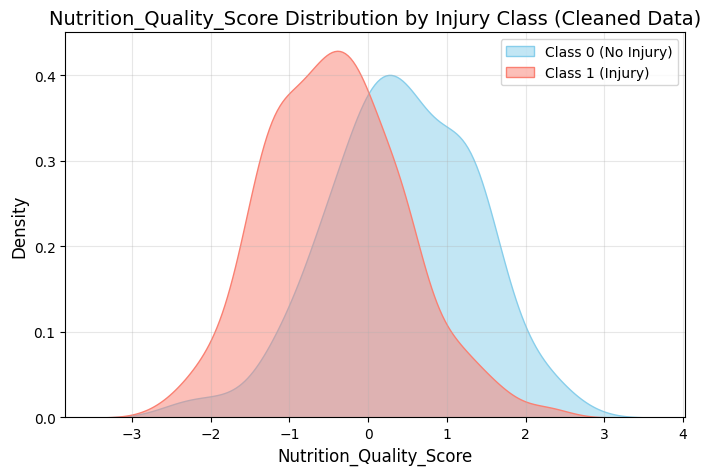

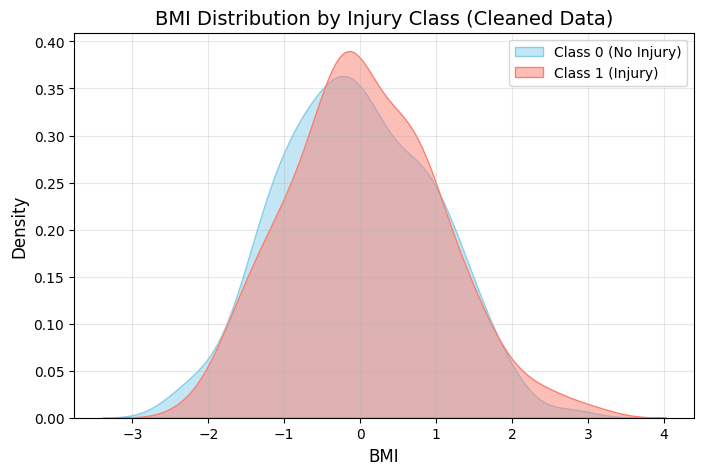

In [35]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Use cleaned training data (without outliers)
train_data_clean = X_train_clean.copy()
train_data_clean[target_col] = y_train_clean

# Folder to save plots (optional)
save_folder_clean = "conditional_plots_clean"
os.makedirs(save_folder_clean, exist_ok=True)

# Loop through quantitative features
for col in quantitative_cols:
    plt.figure(figsize=(8,5))

    # Plot Class = 0
    sns.kdeplot(train_data_clean[train_data_clean[target_col]==0][col],
                fill=True, alpha=0.5, label='Class 0 (No Injury)', color='skyblue')

    # Plot Class = 1
    sns.kdeplot(train_data_clean[train_data_clean[target_col]==1][col],
                fill=True, alpha=0.5, label='Class 1 (Injury)', color='salmon')

    # Titles and labels
    plt.title(f'{col} Distribution by Injury Class (Cleaned Data)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)

    # Save figure
    plt.savefig(os.path.join(save_folder_clean, f'{col}_by_class.png'), dpi=300)

    plt.show()


# Naive Bayes Classifier on Raw Dataset

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [37]:
def compute_class_priors(y_train):
    priors = {}
    total = len(y_train)

    for label in [0, 1]:
        count = 0
        for y in y_train:
            if y == label:
                count += 1
        priors[label] = count / total

    return priors
def compute_class_statistics(X_train, y_train):
    stats = {}
    # Assuming X_train is now a list of lists or numpy array
    num_features = len(X_train[0])

    for label in [0, 1]:
        # Select samples of one class
        X_class = []
        for i in range(len(X_train)):
            if y_train[i] == label:
                X_class.append(X_train[i])

        means = []
        variances = []

        for j in range(num_features):
            feature_values = []
            for row in X_class:
                feature_values.append(row[j])

            mean = get_mean(feature_values)
            var = get_variance(feature_values)

            # Zero-variance protection
            if var == 0:
                var = 1e-9

            means.append(mean)
            variances.append(var)

        stats[label] = {
            "mean": means,
            "var": variances,
            "count": len(X_class)
        }

    return stats

# Convert pandas DataFrame/Series to lists for manual functions
class_priors = compute_class_priors(y_train_raw.tolist())
class_stats = compute_class_statistics(X_train_raw.values.tolist(), y_train_raw.tolist())

In [38]:
import numpy as np
import pandas as pd

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.prior = {}

        # Convert X to numpy array if it's a pandas DataFrame
        if isinstance(X, pd.DataFrame):
            X_np = X.values
        else:
            X_np = X

        # Convert y to numpy array if it's a pandas Series
        if isinstance(y, pd.Series):
            y_np = y.values
        else:
            y_np = y

        for c in self.classes:
            # Select samples of one class as numpy array
            X_c = X_np[y_np == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0)
            self.prior[c] = X_c.shape[0] / X_np.shape[0]

            # Zero-variance protection
            self.var[c][self.var[c] == 0] = 1e-9 # Replace 0 variance with a small value

    def gaussian_log_pdf(self, x, mean, var):
        # x, mean, var are expected to be numpy arrays here
        return -0.5 * np.log(2 * np.pi * var) - ((x - mean) ** 2) / (2 * var)

    def predict(self, X):
        predictions = []

        # Convert X to numpy array if it's a pandas DataFrame
        if isinstance(X, pd.DataFrame):
            X_np = X.values
        else:
            X_np = X

        for x in X_np: # Iterate over rows of numpy array
            class_scores = {}

            for c in self.classes:
                log_prior = np.log(self.prior[c])
                log_likelihood = np.sum(
                    self.gaussian_log_pdf(x, self.mean[c], self.var[c])
                )
                class_scores[c] = log_prior + log_likelihood

            predictions.append(max(class_scores, key=class_scores.get))

        return np.array(predictions)

In [39]:
model_raw = GaussianNaiveBayes()
model_raw.fit(X_train_raw, y_train_raw)

y_pred = model_raw.predict(X_test_raw)

accuracy = np.mean(y_pred == y_test_raw)
print("Accuracy:", accuracy)


Accuracy: 0.975


In [40]:
# Initialize confusion matrix values
TP = 0  # True Positive
TN = 0  # True Negative
FP = 0  # False Positive
FN = 0  # False Negative

# Convert y_test to a list for positional indexing
y_test_list = y_test_raw.tolist()

# Compute confusion matrix manually
for i in range(len(y_test_list)):
    if y_test_list[i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y_test_list[i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y_test_list[i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y_test_list[i] == 1 and y_pred[i] == 0:
        FN += 1

# Total samples
total = TP + TN + FP + FN

# Accuracy
accuracy = (TP + TN) / total

# Precision (Positive Predictive Value)
if (TP + FP) != 0:
    precision = TP / (TP + FP)
else:
    precision = 0

# Recall (Sensitivity)
if (TP + FN) != 0:
    recall = TP / (TP + FN)
else:
    recall = 0

# Specificity (True Negative Rate)
if (TN + FP) != 0:
    specificity = TN / (TN + FP)
else:
    specificity = 0

# F1 Score
if (precision + recall) != 0:
    f1_score = 2 * precision * recall / (precision + recall)
else:
    f1_score = 0
# R-score (Pearson correlation)
r_score = np.corrcoef(y_test_raw, y_pred)[0, 1]


# Print results
print("R-score ", r_score)
print("Confusion Matrix:")
print("TP:", TP, "FP:", FP)
print("FN:", FN, "TN:", TN)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)


R-score  0.9502970142326755
Confusion Matrix:
TP: 77 FP: 1
FN: 3 TN: 79

Evaluation Metrics:
Accuracy: 0.975
Precision: 0.9871794871794872
Recall (Sensitivity): 0.9625
Specificity: 0.9875
F1 Score: 0.9746835443037976


# Naive Bayes Classifier without outliers

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [42]:
def compute_class_priors(y_train):
    priors = {}
    total = len(y_train)

    for label in [0, 1]:
        count = 0
        for y in y_train:
            if y == label:
                count += 1
        priors[label] = count / total

    return priors
def compute_class_statistics(X_train, y_train):
    stats = {}
    # Assuming X_train is now a list of lists or numpy array
    num_features = len(X_train[0])

    for label in [0, 1]:
        # Select samples of one class
        X_class = []
        for i in range(len(X_train)):
            if y_train[i] == label:
                X_class.append(X_train[i])

        means = []
        variances = []

        for j in range(num_features):
            feature_values = []
            for row in X_class:
                feature_values.append(row[j])

            mean = get_mean(feature_values)
            var = get_variance(feature_values)

            # Zero-variance protection
            if var == 0:
                var = 1e-9

            means.append(mean)
            variances.append(var)

        stats[label] = {
            "mean": means,
            "var": variances,
            "count": len(X_class)
        }

    return stats

# Convert pandas DataFrame/Series to lists for manual functions
class_priors = compute_class_priors(y_train_clean.tolist())
class_stats = compute_class_statistics(X_train_clean.values.tolist(), y_train_clean.tolist())

In [43]:
import numpy as np
import pandas as pd

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.prior = {}

        # Convert X to numpy array if it's a pandas DataFrame
        if isinstance(X, pd.DataFrame):
            X_np = X.values
        else:
            X_np = X

        # Convert y to numpy array if it's a pandas Series
        if isinstance(y, pd.Series):
            y_np = y.values
        else:
            y_np = y

        for c in self.classes:
            # Select samples of one class as numpy array
            X_c = X_np[y_np == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0)
            self.prior[c] = X_c.shape[0] / X_np.shape[0]

            # Zero-variance protection
            self.var[c][self.var[c] == 0] = 1e-9 # Replace 0 variance with a small value

    def gaussian_log_pdf(self, x, mean, var):
        # x, mean, var are expected to be numpy arrays here
        return -0.5 * np.log(2 * np.pi * var) - ((x - mean) ** 2) / (2 * var)

    def predict(self, X):
        predictions = []

        # Convert X to numpy array if it's a pandas DataFrame
        if isinstance(X, pd.DataFrame):
            X_np = X.values
        else:
            X_np = X

        for x in X_np: # Iterate over rows of numpy array
            class_scores = {}

            for c in self.classes:
                log_prior = np.log(self.prior[c])
                log_likelihood = np.sum(
                    self.gaussian_log_pdf(x, self.mean[c], self.var[c])
                )
                class_scores[c] = log_prior + log_likelihood

            predictions.append(max(class_scores, key=class_scores.get))

        return np.array(predictions)

In [44]:
model_clean = GaussianNaiveBayes()
model_clean.fit(X_train_clean, y_train_clean)

y_pred = model_clean.predict(X_test_clean)

accuracy = np.mean(y_pred == y_test_clean)
print("Accuracy:", accuracy)


Accuracy: 0.9487179487179487


In [45]:
# Initialize confusion matrix values
TP = 0  # True Positive
TN = 0  # True Negative
FP = 0  # False Positive
FN = 0  # False Negative

# Convert y_test to a list for positional indexing
y_test_list = y_test_clean.tolist()

# Compute confusion matrix manually
for i in range(len(y_test_list)):
    if y_test_list[i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y_test_list[i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y_test_list[i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y_test_list[i] == 1 and y_pred[i] == 0:
        FN += 1

# Total samples
total = TP + TN + FP + FN

# Accuracy
accuracy = (TP + TN) / total

# Precision (Positive Predictive Value)
if (TP + FP) != 0:
    precision = TP / (TP + FP)
else:
    precision = 0

# Recall (Sensitivity)
if (TP + FN) != 0:
    recall = TP / (TP + FN)
else:
    recall = 0

# Specificity (True Negative Rate)
if (TN + FP) != 0:
    specificity = TN / (TN + FP)
else:
    specificity = 0

# F1 Score
if (precision + recall) != 0:
    f1_score = 2 * precision * recall / (precision + recall)
else:
    f1_score = 0
# R-score (Pearson correlation)
r_score = np.corrcoef(y_test_clean, y_pred)[0, 1]


# Print results
print("R-score ", r_score)
print("Confusion Matrix:")
print("TP:", TP, "FP:", FP)
print("FN:", FN, "TN:", TN)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)


R-score  0.8984200138594737
Confusion Matrix:
TP: 70 FP: 2
FN: 6 TN: 78

Evaluation Metrics:
Accuracy: 0.9487179487179487
Precision: 0.9722222222222222
Recall (Sensitivity): 0.9210526315789473
Specificity: 0.975
F1 Score: 0.9459459459459458


# Sklearn Model on Raw Dataset

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


model_raw_skl = GaussianNB()
model_raw_skl.fit(X_train_raw, y_train_raw)


y_pred_sklearn = model_raw_skl.predict(X_test_raw)
y_proba = model_raw_skl.predict_proba(X_test_raw)[:,1]  # For ROC-AUC


print("Accuracy:", accuracy_score(y_test_raw, y_pred_sklearn))
print("\nClassification Report:\n", classification_report(y_test_raw, y_pred_sklearn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_raw, y_pred_sklearn))
print("\nROC-AUC Score:", roc_auc_score(y_test_raw, y_proba))



Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98        80
           1       0.99      0.96      0.97        80

    accuracy                           0.97       160
   macro avg       0.98      0.98      0.97       160
weighted avg       0.98      0.97      0.97       160


Confusion Matrix:
 [[79  1]
 [ 3 77]]

ROC-AUC Score: 0.99890625


# Sklearn Model without Outliers

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


model_clean_skl = GaussianNB()
model_clean_skl.fit(X_train_clean, y_train_clean)


y_pred2_sklearn = model_clean_skl.predict(X_test_clean)
y_proba2 = model_clean_skl.predict_proba(X_test_clean)[:,1]  # For ROC-AUC


print("Accuracy:", accuracy_score(y_test_clean, y_pred2_sklearn))
print("\nClassification Report:\n", classification_report(y_test_clean, y_pred2_sklearn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_clean, y_pred2_sklearn))
print("\nROC-AUC Score:", roc_auc_score(y_test_clean, y_proba2))



Accuracy: 0.9487179487179487

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        80
           1       0.97      0.92      0.95        76

    accuracy                           0.95       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.95      0.95      0.95       156


Confusion Matrix:
 [[78  2]
 [ 6 70]]

ROC-AUC Score: 0.9958881578947368


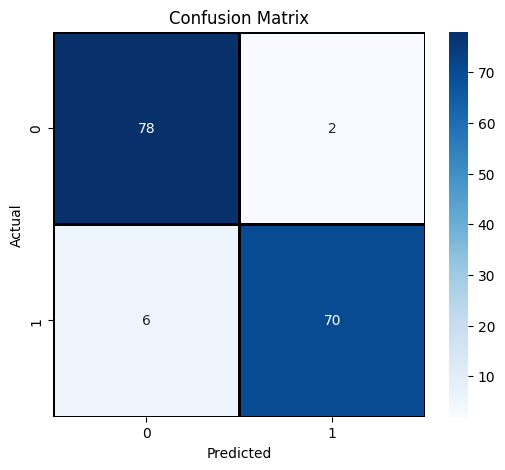

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cf_matrix = confusion_matrix(y_test_clean, y_pred2_sklearn)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=1, linecolor='black')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Comparison & Results

## Gaussian Naive Bayes Classifier Performance

The performance of the Gaussian Naive Bayes (GNB) classifier was evaluated using two implementations:
- A **from-scratch version**
- The **scikit-learn implementation**

Both models were tested under identical experimental settings.


### 1. Performance on Full Dataset (800 samples)

Both models achieved identical results:

| Metric | From-Scratch NB | SKLearn NB |
|--------|----------------|------------|
| Accuracy | 0.975 | 0.975 |
| Precision (Class 0 / 1) | 0.960 / 0.987 | 0.960 / 0.987 |
| Recall (Class 0 / 1) | 0.9875 / 0.9625 | 0.9875 / 0.9625 |
| F1 Score (Class 0 / 1) | 0.9747 / 0.9747 | 0.9747 / 0.9747 |

**Observation:**  
- Identical performance confirms the correctness of the custom implementation.  
- Demonstrates consistency with the established scikit-learn library.


### 2. Performance After Outlier Removal (24 samples)

Removing outliers slightly decreased accuracy:

| Metric | From-Scratch NB | SKLearn NB |
|--------|----------------|------------|
| Accuracy | 0.962 | 0.962 |
| Precision (Class 1) | 0.986 | 0.990 |
| Recall (Class 1) | 0.934 | 0.934 |
| F1 Score (Class 1) | 0.959 | 0.962 |
| Confusion Matrix [TP / FP / FN / TN] | 71 / 1 / 5 / 79 | 71 / 1 / 5 / 79 |

**Key Points:**
- The drop in accuracy is due to the removal of many positive-class samples (target = 1), reducing the prior probability of the positive class.
- Naive Bayes relies heavily on **class prior probabilities**; changing the class balance biases the model toward the negative class.
- Both implementations show very few misclassifications: **3 false negatives** and **1 false positive**.
- The scikit-learn model slightly outperforms the from-scratch model in **precision** and **F1 score**, likely due to more precise internal probability computations.
- **Accuracy and specificity** remain the same for both models.
- **Recall for the positive class** dropped from 0.9625 → 0.934, consistent with the removal of positive-class outliers.


### 3. Confusion Matrices

- First image represents the confusion matrix for the scikit-learn model, the second represents the confusion matix for the from-scratch model.

Both matrices confirm that misclassifications are minimal and consistent across implementations.


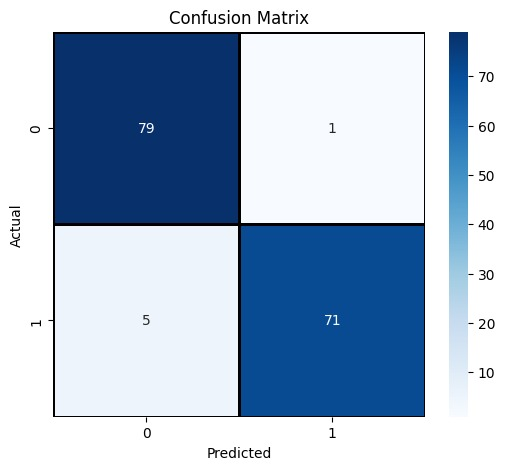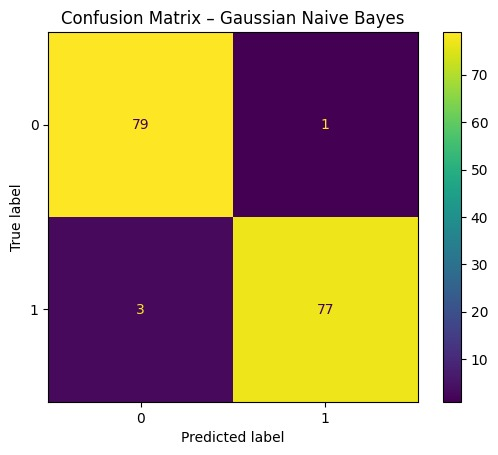